In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings


In [2]:
# Function to return metrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

def get_model_metrics(model_name, y_true, y_pred):
    metrics = {}
    metrics['Model'] = model_name
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['ROC-AUC Score'] = roc_auc_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred)
    metrics['Recall'] = recall_score(y_true, y_pred)
    metrics['F1-Score'] = f1_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)

    return metrics

In [3]:
metrics_table = list()

In [4]:
df1 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/ARP_MitM_sampled.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Active_Wiretap_sampled.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Fuzzing_sampled.csv')
df4 = pd.read_csv("https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Mirai_sampled.csv")
df5 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/OS_Scan_sampled.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SSDP_Flood_sampled.csv')
df7 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SSL_Renegotiation_sampled.csv')
df8 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/SYN_DoS_sampled.csv')
df9 = pd.read_csv('https://raw.githubusercontent.com/divaamahajan/DataMining/main/random-sampled-datasets/Video_Injection_sampled.csv')

In [5]:
df1 = df1.drop(['Unnamed: 0',	'index'], axis=1)
df1.head(2)

x           0            1              2           3            4  \
0  1  162.251328  1287.930495  137946.585241  277.376266  1290.621872   
1  1  387.752010  1306.058869  220121.097478  637.303410  1316.728781   

               5            6            7              8  ...            105  \
0  139699.421710   862.105671  1294.355651  140928.760080  ...  179786.099514   
1  207438.876258  1924.246172  1331.715608  189917.368904  ...  181996.614142   

   106  107           108          109         110          111  \
0  0.0  0.0  28128.538982  1335.626000  425.845352  1335.626000   
1  0.0  0.0  28051.498932  1340.999983  425.651549  1340.999983   

             112  113  114  
0  181344.263583  0.0  0.0  
1  181179.241248  0.0  0.0  

[2 rows x 116 columns]

In [6]:
df2 = df2.drop(['Unnamed: 0',	'index'], axis=1)
df2.head(2)

x           0            1              2           3            4  \
0  1  163.049513  1306.129759  133895.850037  283.632401  1305.573004   
1  1  174.527618  1295.076626  145592.073006  295.358524  1297.920763   

               5           6            7              8  ...            105  \
0  133300.917659  871.595910  1300.438768  137735.237195  ...   57217.762833   
1  141931.132312  883.612806  1297.616196  140815.653256  ...  183926.684931   

            106           107           108          109         110  \
0  1.914975e-09  1.143837e-07  27911.418879  1227.676709  237.573391   
1  0.000000e+00  0.000000e+00  26755.578455  1334.536548  427.019985   

           111            112       113       114  
0  1229.142248   56441.116252  0.221214  0.001032  
1  1335.884650  182346.067560  0.000000  0.000000  

[2 rows x 116 columns]

In [7]:
df3 = df3.drop(['Unnamed: 0',	'index'], axis=1)
df3.head(2)

x           0            1              2           3            4  \
0  1  183.422791  1336.527256  190462.742960  291.849930  1336.289854   
1  1  237.879413  1356.333015  175809.072163  346.842926  1347.008011   

               5           6            7              8  ...            105  \
0  189878.320827  850.126451  1336.942110  187900.563560  ...  179608.126627   
1  183339.520567  903.558706  1340.022021  187013.751527  ...  183211.967235   

   106  107           108          109         110          111  \
0  0.0  0.0  28076.951594  1340.929813  425.522919  1340.929813   
1  0.0  0.0  28082.917849  1340.514610  426.459844  1340.514610   

             112  113  114  
0  181069.754307  0.0  0.0  
1  181867.998735  0.0  0.0  

[2 rows x 116 columns]

In [8]:
df4 = df4.drop(['0'], axis=1)
df4 = df4.drop(['Unnamed: 0',	'index'], axis=1)
df4.head(2)

x           1          2         3           4          5         6  \
0  1  112.097168  60.035565  0.739410  153.541719  60.066094  1.315846   
1  1  117.742473  60.138909  1.829893  162.204865  60.210187  2.786475   

            7          8         9  ...           106  107  108           109  \
0  361.114006  60.101399  1.764327  ...  5.002221e-12  0.0  0.0  20727.018620   
1  376.574119  60.236818  3.256390  ...  4.092726e-12  0.0  0.0  22446.495481   

    110       111   112           113  114  115  
0  60.0  0.000010  60.0  9.276846e-11  0.0  0.0  
1  60.0  0.000006  60.0  4.001777e-11  0.0  0.0  

[2 rows x 116 columns]

In [9]:
df5 = df5.drop(['Unnamed: 0',	'index'], axis=1)
df5.head(2)

x           0     1             2            3     4             5  \
0  1  774.199578  60.0  5.002221e-12  1172.275787  60.0  8.640200e-12   
1  1  732.896796  60.0  8.185452e-12  1160.217723  60.0  1.364242e-12   

             6     7             8  ...  105  106  107  108   109  110  \
0  3044.228765  60.0  2.273737e-12  ...  0.0  0.0  0.0  1.0  60.0  0.0   
1  3296.988952  60.0  3.592504e-11  ...  0.0  0.0  0.0  1.0  60.0  0.0   

         111  112  113  114  
0  60.000000  0.0  0.0  0.0  
1  84.852814  0.0  0.0  0.0  

[2 rows x 116 columns]

In [10]:
df6 = df6.drop(['Unnamed: 0',	'index'], axis=1)
df6.head(2)

x         0           1              2         3           4  \
0  0  1.997162  830.381872  385019.472302  1.998296  830.029123   
1  0  2.996940  586.005354  375805.676539  2.998163  585.869927   

               5         6           7              8  ...          105  106  \
0  385019.970028  1.999432  829.676374  385020.218892  ...     0.000000  0.0   
1  375719.284013  2.999387  585.734436  375632.816999  ...  3080.249997  0.0   

   107       108          109   110          111      112  113  114  
0  0.0  1.000000  1450.000000   0.0  1450.000000     0.00  0.0  0.0  
1  0.0  1.999994   153.499836  55.5   153.499836  3080.25  0.0  0.0  

[2 rows x 116 columns]

In [11]:
df7 = df7.drop(['Unnamed: 0',	'index'], axis=1)
df7.head(3)

x           0            1              2           3            4  \
0  0  201.933924   751.076479  448315.216282  267.334718   749.056876   
1  0  275.855663   745.492465  441894.936067  408.565730   744.033612   
2  0   45.069225  1416.091201   31374.311828   78.276855  1416.709773   

               5            6            7              8  ...           105  \
0  445832.685644   603.764783   745.692054  441529.126214  ...  33157.526501   
1  439475.223524  1090.770627   742.309873  436848.814508  ...  30043.252662   
2   30919.455107   253.852811  1412.537252   34984.757411  ...  35626.304470   

            106           107           108          109         110  \
0  0.000000e+00  0.000000e+00   5889.520552   147.270744  179.537822   
1  0.000000e+00  0.000000e+00  17746.423096   150.873977  179.105631   
2  5.470622e-12  1.109738e-08  16501.769970  1411.756991  184.838747   

           111           112           113           114  
0   147.270744  32233.829699  0.000000e+00  0.000000e+00  
1   150.873977  32078.826919  0.000000e+00  0.000000e+00  
2  1413.031423  34165.362231  1.418180e-11  1.060973e-08  

[3 rows x 116 columns]

In [12]:
df8 = df8.drop(['Unnamed: 0',	'index'], axis=1)
df8.head(2)

x         0           1              2         3           4  \
0  0  1.999868  773.955314  456975.998003  1.999921  773.973188   
1  0  2.998371  999.425957  406159.137822  2.999023  999.388902   

               5         6           7              8  ...           105  106  \
0  456975.999281  1.999974  773.991063  456975.999920  ...  0.000000e+00  0.0   
1  406175.842945  2.999674  999.351854  406192.541806  ...  9.313226e-10  0.0   

   107       108     109       110     111           112  113  114  
0  0.0  1.000000    98.0  0.000000    98.0  0.000000e+00  0.0  0.0  
1  0.0  1.999998  1450.0  0.000022  1450.0  4.656613e-10  0.0  0.0  

[2 rows x 116 columns]

In [13]:
df9 = df9.drop(['Unnamed: 0',	'index'], axis=1)
df9.head(2)

x         0            1              2         3            4  \
0  0  1.995812   862.869190  425754.375319  1.997485   862.321515   
1  0  2.995771  1080.219198  377918.162404  2.997460  1079.731725   

               5         6            7              8  ...            105  \
0  425755.575114  1.999161   861.773838  425756.175013  ...  425756.249250   
1  378131.164377  2.999153  1079.243977  378343.810605  ...  378439.385077   

   106  107       108          109         110          111            112  \
0  0.0  0.0  1.999992   861.502738  652.500000   861.502738  425756.249993   
1  0.0  0.0  2.999992  1079.002440  615.182037  1079.002440  378448.938548   

   113  114  
0  0.0  0.0  
1  0.0  0.0  

[2 rows x 116 columns]

In [14]:
df1.columns = ['feature_'+str(i) for i in range(0,116)]
df2.columns = ['feature_'+str(i) for i in range(0,116)]
df3.columns = ['feature_'+str(i) for i in range(0,116)]
df4.columns = ['feature_'+str(i) for i in range(0,116)]
df5.columns = ['feature_'+str(i) for i in range(0,116)]
df6.columns = ['feature_'+str(i) for i in range(0,116)]
df7.columns = ['feature_'+str(i) for i in range(0,116)]
df8.columns = ['feature_'+str(i) for i in range(0,116)]
df9.columns = ['feature_'+str(i) for i in range(0,116)]

In [15]:
df1['attack']=1
df2['attack']=2
df3['attack']=3
df4['attack']=4
df5['attack']=5
df6['attack']=6
df7['attack']=7
df8['attack']=8
df9['attack']=9

In [16]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [17]:
df.head()

feature_0   feature_1    feature_2      feature_3   feature_4    feature_5  \
0          1  162.251328  1287.930495  137946.585241  277.376266  1290.621872   
1          1  387.752010  1306.058869  220121.097478  637.303410  1316.728781   
2          1  379.466053  1347.077216  172679.023477  633.858286  1345.691594   
3          1  428.413637  1335.090314  193351.408058  681.055680  1333.676220   
4          1  151.173948  1279.523342  157603.223345  269.501602  1286.223631   

       feature_6    feature_7    feature_8      feature_9  ...  feature_107  \
0  139699.421710   862.105671  1294.355651  140928.760080  ...          0.0   
1  207438.876258  1924.246172  1331.715608  189917.368904  ...          0.0   
2  175484.443945  1942.359870  1342.632301  179854.874354  ...          0.0   
3  190797.906136  1971.296012  1337.078715  183403.845860  ...          0.0   
4  151292.562593   855.352870  1290.355020  147041.015366  ...          0.0   

   feature_108   feature_109  feature_110  feature_111  feature_112  \
0          0.0  28128.538982  1335.626000   425.845352  1335.626000   
1          0.0  28051.498932  1340.999983   425.651549  1340.999983   
2          0.0  27751.882884  1341.513646   424.904429  1341.513646   
3          0.0  27948.812569  1341.115622   425.224505  1341.115622   
4          0.0  28174.860496  1334.685469   426.811681  1334.685469   

     feature_113  feature_114  feature_115  attack  
0  181344.263583          0.0          0.0       1  
1  181179.241248          0.0          0.0       1  
2  180543.774059          0.0          0.0       1  
3  180815.879583          0.0          0.0       1  
4  182168.211433          0.0          0.0       1  

[5 rows x 117 columns]

In [18]:
df.columns = ['feature_'+str(i) for i in range(len(df.columns))]

In [19]:
df.columns.values[0]='label'
df.columns.values[-1]='attack'

In [20]:
cols = list(df)[1:]
cols.append('label')
df = df[cols]

In [21]:
df.head()

feature_1    feature_2      feature_3   feature_4    feature_5  \
0  162.251328  1287.930495  137946.585241  277.376266  1290.621872   
1  387.752010  1306.058869  220121.097478  637.303410  1316.728781   
2  379.466053  1347.077216  172679.023477  633.858286  1345.691594   
3  428.413637  1335.090314  193351.408058  681.055680  1333.676220   
4  151.173948  1279.523342  157603.223345  269.501602  1286.223631   

       feature_6    feature_7    feature_8      feature_9    feature_10  ...  \
0  139699.421710   862.105671  1294.355651  140928.760080   8708.282524  ...   
1  207438.876258  1924.246172  1331.715608  189917.368904  19614.490170  ...   
2  175484.443945  1942.359870  1342.632301  179854.874354  19641.527990  ...   
3  190797.906136  1971.296012  1337.078715  183403.845860  18836.905420  ...   
4  151292.562593   855.352870  1290.355020  147041.015366   8714.034018  ...   

   feature_108   feature_109  feature_110  feature_111  feature_112  \
0          0.0  28128.538982  1335.626000   425.845352  1335.626000   
1          0.0  28051.498932  1340.999983   425.651549  1340.999983   
2          0.0  27751.882884  1341.513646   424.904429  1341.513646   
3          0.0  27948.812569  1341.115622   425.224505  1341.115622   
4          0.0  28174.860496  1334.685469   426.811681  1334.685469   

     feature_113  feature_114  feature_115  attack  label  
0  181344.263583          0.0          0.0       1      1  
1  181179.241248          0.0          0.0       1      1  
2  180543.774059          0.0          0.0       1      1  
3  180815.879583          0.0          0.0       1      1  
4  182168.211433          0.0          0.0       1      1  

[5 rows x 117 columns]

In [22]:
df.describe()

feature_1     feature_2      feature_3     feature_4     feature_5  \
count  17994.000000  17994.000000   17994.000000  17994.000000  17994.000000   
mean     590.001582    857.763041  179333.709871    971.216290    858.429179   
std     1672.259132    525.861139  157456.903472   2786.477502    526.194303   
min        1.000000     52.000000       0.000000      1.000000     52.000000   
25%       56.061229    136.000000     225.624024     86.288658    136.000000   
50%      139.743726   1231.631585  170520.674718    216.059493   1234.975971   
75%      243.685256   1328.156284  222725.513399    381.475034   1331.337628   
max     7436.865335   1452.000000  488785.862233  12392.617904   1452.000000   

           feature_6     feature_7     feature_8      feature_9  \
count   17994.000000  17994.000000  17994.000000   17994.000000   
mean   178754.480328   2849.822370    859.490195  177962.861751   
std    157135.199378   8352.314584    526.723421  156845.310038   
min         0.000000      1.000000     52.000000       0.000000   
25%       304.027158    200.777767    136.000000     415.872886   
50%    173093.596850    574.416212   1236.700796  177195.319543   
75%    213747.656584   1089.506496   1335.374246  204456.933708   
max    488812.666765  37163.978483   1452.000000  488832.368521   

          feature_10  ...   feature_108   feature_109   feature_110  \
count   17994.000000  ...  17994.000000  17994.000000  17994.000000   
mean    26083.685756  ...     -0.000052  15135.163135    860.338704   
std     79552.427675  ...      0.004580  12685.595423    608.959023   
min         1.000000  ...     -0.276309      1.000000     52.000000   
25%      1356.221785  ...      0.000000     72.628172    136.000000   
50%      5216.721656  ...      0.000000  17303.812382   1334.520728   
75%     10379.729109  ...      0.000000  27960.225050   1341.307654   
max    354099.847565  ...      0.347487  41243.896714   1452.000000   

        feature_111   feature_112   feature_113   feature_114   feature_115  \
count  17994.000000  17994.000000  1.799400e+04  17994.000000  17994.000000   
mean     220.391662    911.752972  8.622016e+04     -0.642570     -0.000201   
std      189.612557    590.260119  8.274561e+04     24.555470      0.006196   
min        0.000000     52.000000  0.000000e+00  -2011.316691     -0.314397   
25%        0.000007    150.507101  9.313226e-10      0.000000      0.000000   
50%      221.765288   1335.198361  5.275406e+04      0.000000      0.000000   
75%      425.192396   1341.489508  1.807886e+05      0.000000      0.000000   
max      699.170575   1452.000000  4.888395e+05      3.472361      0.405684   

             attack         label  
count  17998.000000  17998.000000  
mean       4.999889      0.350317  
std        2.582183      0.477082  
min        1.000000      0.000000  
25%        3.000000      0.000000  
50%        5.000000      0.000000  
75%        7.000000      1.000000  
max        9.000000      1.000000  

[8 rows x 117 columns]

In [23]:
df_null = df[df.isna().any(axis=1)]
df_null

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
999         NaN        NaN        NaN        NaN        NaN        NaN   
1999        NaN        NaN        NaN        NaN        NaN        NaN   
999         NaN        NaN        NaN        NaN        NaN        NaN   
1999        NaN        NaN        NaN        NaN        NaN        NaN   

      feature_7  feature_8  feature_9  feature_10  ...  feature_108  \
999         NaN        NaN        NaN         NaN  ...          NaN   
1999        NaN        NaN        NaN         NaN  ...          NaN   
999         NaN        NaN        NaN         NaN  ...          NaN   
1999        NaN        NaN        NaN         NaN  ...          NaN   

      feature_109  feature_110  feature_111  feature_112  feature_113  \
999           NaN          NaN          NaN          NaN          NaN   
1999          NaN          NaN          NaN          NaN          NaN   
999           NaN          NaN          NaN          NaN          NaN   
1999          NaN          NaN          NaN          NaN          NaN   

      feature_114  feature_115  attack  label  
999           NaN          NaN       8      0  
1999          NaN          NaN       8      1  
999           NaN          NaN       9      0  
1999          NaN          NaN       9      1  

[4 rows x 117 columns]

In [24]:
df = df.dropna()
df_null = df[df.isna().any(axis=1)]
df_null

Empty DataFrame
Columns: [feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8, feature_9, feature_10, feature_11, feature_12, feature_13, feature_14, feature_15, feature_16, feature_17, feature_18, feature_19, feature_20, feature_21, feature_22, feature_23, feature_24, feature_25, feature_26, feature_27, feature_28, feature_29, feature_30, feature_31, feature_32, feature_33, feature_34, feature_35, feature_36, feature_37, feature_38, feature_39, feature_40, feature_41, feature_42, feature_43, feature_44, feature_45, feature_46, feature_47, feature_48, feature_49, feature_50, feature_51, feature_52, feature_53, feature_54, feature_55, feature_56, feature_57, feature_58, feature_59, feature_60, feature_61, feature_62, feature_63, feature_64, feature_65, feature_66, feature_67, feature_68, feature_69, feature_70, feature_71, feature_72, feature_73, feature_74, feature_75, feature_76, feature_77, feature_78, feature_79, feature_80, feature_81, feature_82, feature_83, feature_84, feature_85, feature_86, feature_87, feature_88, feature_89, feature_90, feature_91, feature_92, feature_93, feature_94, feature_95, feature_96, feature_97, feature_98, feature_99, feature_100, ...]
Index: []

[0 rows x 117 columns]

In [25]:
from google.colab import files
# Save the DataFrame to an Excel file
df.to_excel('output.xlsx', index=False)
# Download the Excel file to our local system
files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
df.shape

(17994, 117)

In [27]:
from sklearn.preprocessing import MinMaxScaler

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
df_scaled = MinMaxScaler().fit_transform(df)

#view first five rows of scaled DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = list(df))
df_scaled.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.021686   0.882807   0.282223   0.022303   0.884730   0.285793   
1   0.052012   0.895756   0.450343   0.051350   0.903378   0.424373   
2   0.050897   0.925055   0.353282   0.051071   0.924065   0.359001   
3   0.057480   0.916493   0.395575   0.054880   0.915483   0.390329   
4   0.020196   0.876802   0.322438   0.021668   0.881588   0.309510   

   feature_7  feature_8  feature_9  feature_10  ...  feature_108  feature_109  \
0   0.023171   0.887397   0.288297    0.024590  ...     0.442948     0.681997   
1   0.051752   0.914083   0.388512    0.055390  ...     0.442948     0.680129   
2   0.052239   0.921880   0.367928    0.055466  ...     0.442948     0.672865   
3   0.053018   0.917913   0.375188    0.053194  ...     0.442948     0.677639   
4   0.022989   0.884539   0.300800    0.024606  ...     0.442948     0.683120   

   feature_110  feature_111  feature_112  feature_113  feature_114  \
0     0.916876     0.609072     0.916876     0.370969     0.998277   
1     0.920714     0.608795     0.920714     0.370631     0.998277   
2     0.921081     0.607726     0.921081     0.369331     0.998277   
3     0.920797     0.608184     0.920797     0.369888     0.998277   
4     0.916204     0.610454     0.916204     0.372654     0.998277   

   feature_115  attack  label  
0     0.436614     0.0    1.0  
1     0.436614     0.0    1.0  
2     0.436614     0.0    1.0  
3     0.436614     0.0    1.0  
4     0.436614     0.0    1.0  

[5 rows x 117 columns]

In [28]:
from scipy import stats
import pandas as pd
import numpy as np
z_scores = np.abs(stats.zscore(df_scaled, nan_policy='omit'))
z_scores = pd.DataFrame(z_scores, columns=df_scaled.columns)
z_scores.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.255799   0.818048   0.262855   0.249009   0.821379   0.248551   
1   0.120947   0.852522   0.259046   0.119837   0.870994   0.182551   
2   0.125902   0.930527   0.042265   0.121073   0.926038   0.020811   
3   0.096631   0.907731   0.089028   0.104135   0.903203   0.076646   
4   0.262423   0.802060   0.138013   0.251836   0.813020   0.174771   

   feature_7  feature_8  feature_9  feature_10  ...  feature_108  feature_109  \
0   0.237991   0.825628   0.236125    0.218421  ...     0.011281     1.024291   
1   0.110820   0.896559   0.076221    0.081322  ...     0.011281     1.018217   
2   0.108651   0.917285   0.012063    0.080982  ...     0.011281     0.994598   
3   0.105187   0.906741   0.034691    0.091097  ...     0.011281     1.010123   
4   0.238799   0.818032   0.197154    0.218348  ...     0.011281     1.027942   

   feature_110  feature_111  feature_112  feature_113  feature_114  \
0     0.780513     1.083575     0.718132     1.149629     0.026169   
1     0.789338     1.082553     0.727237     1.147635     0.026169   
2     0.790182     1.078612     0.728107     1.139955     0.026169   
3     0.789528     1.080300     0.727433     1.143243     0.026169   
4     0.778969     1.088671     0.716539     1.159587     0.026169   

   feature_115    attack     label  
0     0.032363  1.548927  1.361922  
1     0.032363  1.548927  1.361922  
2     0.032363  1.548927  1.361922  
3     0.032363  1.548927  1.361922  
4     0.032363  1.548927  1.361922  

[5 rows x 117 columns]

In [29]:
outliers_threshold = 3
mask = (z_scores <= outliers_threshold).all(axis=1)
print(f" No. of outlier rows = {len(mask[mask == False])} from total {df_scaled.shape[0]} rows")

 No. of outlier rows = 2506 from total 17994 rows


In [30]:
df_zscored = df_scaled[mask]
df_zscored.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.021686   0.882807   0.282223   0.022303   0.884730   0.285793   
1   0.052012   0.895756   0.450343   0.051350   0.903378   0.424373   
3   0.057480   0.916493   0.395575   0.054880   0.915483   0.390329   
4   0.020196   0.876802   0.322438   0.021668   0.881588   0.309510   
5   0.049525   0.927026   0.348894   0.050394   0.927694   0.346782   

   feature_7  feature_8  feature_9  feature_10  ...  feature_108  feature_109  \
0   0.023171   0.887397   0.288297    0.024590  ...     0.442948     0.681997   
1   0.051752   0.914083   0.388512    0.055390  ...     0.442948     0.680129   
3   0.053018   0.917913   0.375188    0.053194  ...     0.442948     0.677639   
4   0.022989   0.884539   0.300800    0.024606  ...     0.442948     0.683120   
5   0.051844   0.926265   0.352461    0.055374  ...     0.442948     0.679610   

   feature_110  feature_111  feature_112  feature_113  feature_114  \
0     0.916876     0.609072     0.916876     0.370969     0.998277   
1     0.920714     0.608795     0.920714     0.370631     0.998277   
3     0.920797     0.608184     0.920797     0.369888     0.998277   
4     0.916204     0.610454     0.916204     0.372654     0.998277   
5     0.920827     0.608554     0.920827     0.370338     0.998277   

   feature_115  attack  label  
0     0.436614     0.0    1.0  
1     0.436614     0.0    1.0  
3     0.436614     0.0    1.0  
4     0.436614     0.0    1.0  
5     0.436614     0.0    1.0  

[5 rows x 117 columns]

In [31]:
df_zscored.shape

(15488, 117)

In [32]:
X = df_scaled.drop(['attack', 'label'], axis=1) # features
y = df_scaled['label'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
len(list(df_scaled))

117

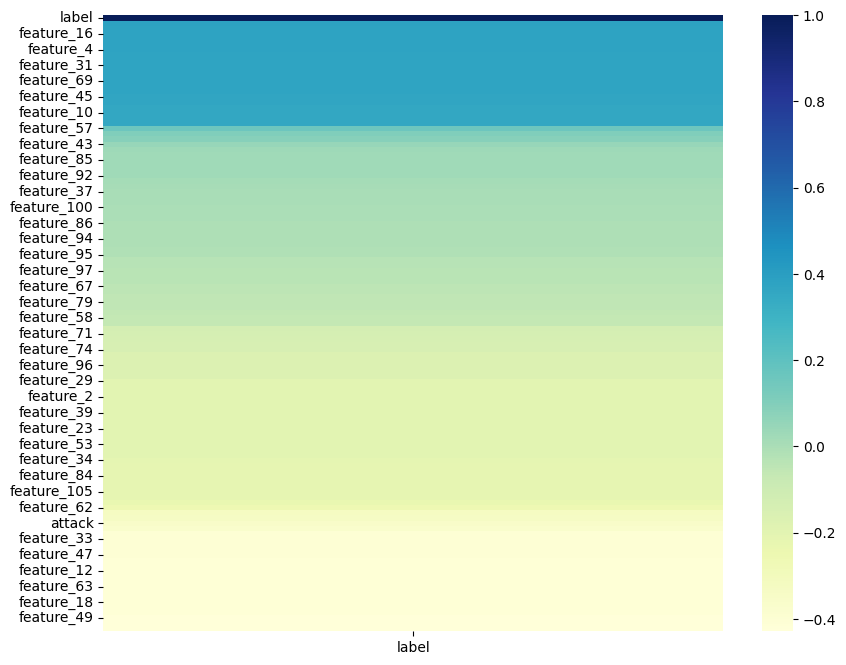

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
corr = ((df_scaled.corr().iloc[:,-1]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, cmap="YlGnBu")
plt.show()

In [35]:
corr[(corr["label"] > -0.3) & (corr["label"] < 0.3)]

label
feature_57   0.159539
feature_109  0.103435
feature_50   0.085780
feature_43   0.046523
feature_102  0.032101
...               ...
feature_98  -0.214617
feature_105 -0.215071
feature_112 -0.215395
feature_55  -0.228069
feature_62  -0.256166

[73 rows x 1 columns]

In [36]:
corr[(corr["label"] <= -0.3) | (corr["label"] >= 0.3)]

label
label       1.000000
feature_28  0.381291
feature_13  0.377549
feature_16  0.376207
feature_1   0.376136
feature_19  0.374953
feature_4   0.374840
feature_78  0.373190
feature_59  0.373190
feature_31  0.372689
feature_66  0.372689
feature_38  0.371886
feature_69  0.371886
feature_22  0.371786
feature_7   0.371496
feature_45  0.369014
feature_72  0.369014
feature_25  0.357226
feature_10  0.356164
feature_75  0.354424
feature_52  0.354424
feature_64 -0.323164
feature_65 -0.330280
attack     -0.350960
feature_61 -0.370843
feature_54 -0.401619
feature_33 -0.403889
feature_30 -0.404305
feature_40 -0.404824
feature_47 -0.404862
feature_15 -0.412430
feature_27 -0.413055
feature_12 -0.413283
feature_9  -0.415228
feature_24 -0.415280
feature_63 -0.415680
feature_56 -0.416125
feature_3  -0.416228
feature_18 -0.416237
feature_6  -0.416448
feature_21 -0.416473
feature_49 -0.427271
feature_35 -0.428844
feature_42 -0.428953

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

In [38]:
# Feature selection and engineering
selector = SelectKBest(f_classif, k=50)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

In [39]:
metrics_table = list()
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500],
}


# Create an instance of the model
logreg = LogisticRegression()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=1  )

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_logreg =LogisticRegression(**grid_search.best_params_)

#Train the model on the training data
best_logreg.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_logreg = best_logreg.predict(X_test)

#get the Performance metrics by method created above
metric_logreg = get_model_metrics(model_name="LogisticRegression", y_true=y_test, y_pred = y_pred_logreg)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_logreg)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_logreg, orient='index', columns=['Value'])


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'C': 1.0, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.820840569642237


Value
Model          LogisticRegression
Accuracy                  0.82384
ROC-AUC Score            0.781393
Precision                 0.80746
Recall                   0.643891
F1-Score                 0.716458
Kappa                    0.591028
MCC                      0.598995

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create an instance of the model
dt = DecisionTreeClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Create an instance of the model with the best parameters
best_dt = DecisionTreeClassifier(**grid_search.best_params_)

# Train the model on the training data
best_dt.fit(X_train, y_train)

# Calculate predictions on Model
y_pred_dt = best_dt.predict(X_test)

# Get the Performance metrics by method created above
metric_dt = get_model_metrics(model_name="DecisionTreeClassifier", y_true=y_test, y_pred = y_pred_dt)

# Add metric to global list for conclusive evaluation
metrics_table.append(metric_dt)

# Display metric dictionary in df
pd.DataFrame.from_dict(metric_dt, orient='index', columns=['Value'])


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score: 0.9631121917332406


Value
Model          DecisionTreeClassifier
Accuracy                     0.964712
ROC-AUC Score                 0.96128
Precision                    0.947875
Recall                       0.950161
F1-Score                     0.949016
Kappa                        0.922035
MCC                          0.922037

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Create an instance of the model
rf = RandomForestClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# #Train the model on the training data
# rf.fit(X_train, y_train)

# #Calculate predictions on Model
# y_pred_rf = rf.predict(X_test)

# Train and evaluate the model with the best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="RandomForestClassifier", y_true=y_test, y_pred = y_pred_rf)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.9703369225425493


Value
Model          RandomForestClassifier
Accuracy                      0.97277
ROC-AUC Score                0.970471
Precision                      0.9584
Recall                       0.963023
F1-Score                     0.960706
Kappa                        0.939873
MCC                          0.939879

In [42]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.1],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Create an instance of the model
gb = GradientBoostingClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

best_gb = GradientBoostingClassifier(**grid_search.best_params_)

# Train the model on the training data
best_gb.fit(X_train, y_train)

# Calculate predictions on Model
y_pred_gb = best_gb.predict(X_test)

# Get the Performance metrics by method created above
metric_gb = get_model_metrics(model_name="GradientBoostingClassifier", y_true=y_test, y_pred=y_pred_gb)

# Add metric to global list for conclusive evaluation
metrics_table.append(metric_gb)

# Display metric dictionary in df
pd.DataFrame.from_dict(metric_gb, orient='index', columns=['Value'])


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.9661688086141021


Value
Model          GradientBoostingClassifier
Accuracy                         0.966935
ROC-AUC Score                    0.963547
Precision                        0.951807
Recall                           0.952572
F1-Score                          0.95219
Kappa                            0.926919
MCC                              0.926919

In [43]:
from sklearn.svm import SVC

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create an instance of the model
svm = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Train the model on the training data with the best hyperparameters
best_svm = SVC(**grid_search.best_params_)
best_svm.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_svm = best_svm.predict(X_test)

#get the Performance metrics by method created above
metric_svm = get_model_metrics(model_name="SupportVectorMachine", y_true=y_test, y_pred = y_pred_svm)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_svm)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_svm, orient='index', columns=['Value'])


Value
Model          SupportVectorMachine
Accuracy                   0.791609
ROC-AUC Score              0.759609
Precision                  0.717047
Recall                     0.655949
F1-Score                   0.685139
Kappa                      0.529868
MCC                        0.531042

In [44]:
metric_df = pd.DataFrame(metrics_table)
metric_df.style.highlight_max(axis=0, subset=metric_df.columns[1:])

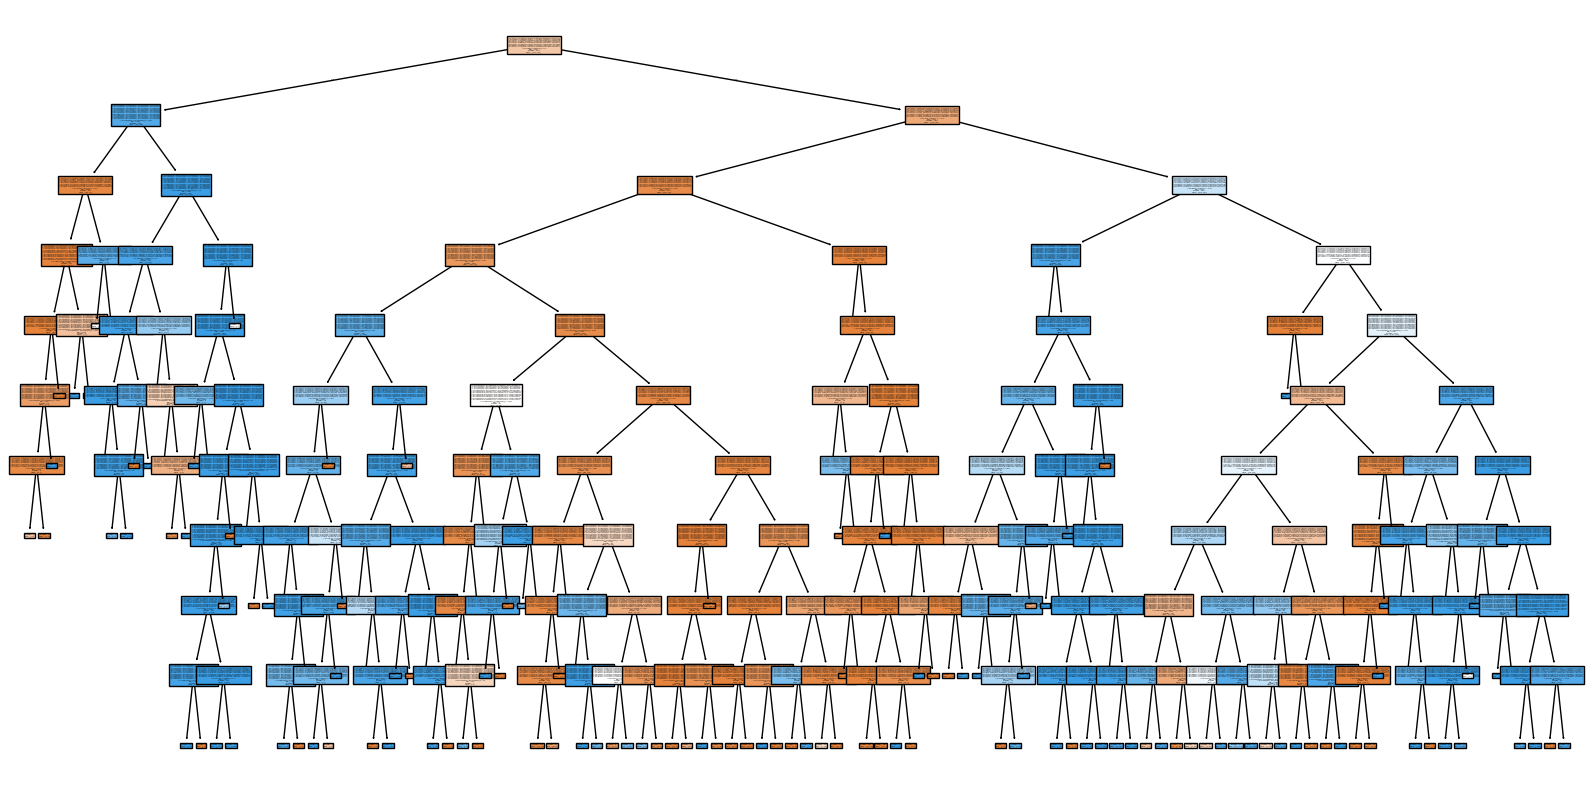

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualize the first decision tree in the random forest
plt.figure(figsize=(20,10))
plot_tree(best_rf.estimators_[0], feature_names=list(X_train), filled=True)
plt.show()


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import numpy as np

In [47]:
print("X_train shape:", X_train.shape)  # Should be (n_samples, 1, 115)
print("X_test shape:", X_test.shape)   # Should be (n_test_samples, 1, 115)

X_train shape: (14395, 50)
X_test shape: (3599, 50)


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import numpy as np
import pandas as pd # Import pandas for Series .iloc accessor

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

def create_sequences(data, labels, seq_length=10):
    X_seq, y_seq = [], []
    for i in range(0, len(data) - seq_length + 1, 1):
        X_seq.append(data[i:i+seq_length])  # Shape: (seq_length, number_of_features)
        # Use iloc to access the label by integer position
        y_seq.append(labels.iloc[i+seq_length-1])  # Label for the last packet
    return np.array(X_seq), np.array(y_seq)

# Apply to your data
seq_length = 10
# Pass the 2D arrays X_train and X_test directly
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Reshape for CNN-LSTM
# X_train_seq shape will be (samples, timesteps, features). We need to add a channel dimension.
# The channel dimension is typically 1 for univariate data or data where features are independent
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], seq_length, X_train.shape[1], 1))
# X_test_seq shape will be (samples, timesteps, features). We need to add a channel dimension.
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], seq_length, X_test.shape[1], 1))

print("X_train_seq shape:", X_train_seq.shape)
print("X_test_seq shape:", X_test_seq.shape)

X_train shape: (14395, 50)
X_test shape: (3599, 50)
X_train_seq shape: (14386, 10, 50, 1)
X_test_seq shape: (3590, 10, 50, 1)


In [49]:
# Define CNN-LSTM model
model = Sequential([
    # CNN layers to extract spatial features
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1, 115), padding='same'),
    MaxPooling1D(pool_size=1),  # Optional, can be removed since timestep=1
    Dropout(0.2),

    # LSTM layers to model temporal dependencies
    LSTM(64, return_sequences=False),  # No return_sequences since timestep=1
    Dropout(0.2),

    # Dense layers for classification
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (Normal vs Attack)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 64)          │        22,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,225 (219.63 KB)

 Trainable params: 56,225 (219.63 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model = Sequential([
    # CNN layers (applied to each timestep)
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10, 115), padding='same'),
    MaxPooling1D(pool_size=2),  # Reduce feature dimension
    Dropout(0.2),

    # LSTM layers
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),

    # Dense layers
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 10, 64)         │        22,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,129 (266.13 KB)

 Trainable params: 68,129 (266.13 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# %%
# Make sure necessary libraries are imported
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

# Re-execute previous steps to ensure data is correctly processed
# Assuming 'df' is your final processed DataFrame before scaling and split

# Scale the data again if needed, ensuring it's the version *before* train_test_split
# and feature selection if you want to apply feature selection *after* sequence creation.
# However, your current code applies feature selection *before* sequence creation.
# Let's stick to that flow for now but adjust the sequence creation and model input shape.

# Assuming X and y are the feature and target data BEFORE train_test_split and feature selection
# X = df.drop(['attack', 'label'], axis=1) # features
# y = df['label'] # target

# Re-create X_train, X_test, y_train, y_test from the scaled data as per your notebook logic
# Ensure df_scaled is available from previous cells.
# X_scaled = df_scaled.drop(['attack', 'label'], axis=1)
# y_scaled = df_scaled['label']
# X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Feature selection applied to scaled data
# selector = SelectKBest(f_classif, k=50)
# X_train_selected = selector.fit_transform(X_train_scaled, y_train_scaled)
# X_test_selected = selector.transform(X_test_scaled)

# Your current code uses X_train and y_train from the cell *before* feature selection
# and then applies feature selection IN PLACE to X_train and X_test.
# Let's use the X_train and X_test AFTER feature selection for sequence creation.
# So, X_train and X_test are already the feature-selected arrays with 50 features.

print("X_train shape before sequence creation:", X_train.shape)
print("X_test shape before sequence creation:", X_test.shape)

def create_sequences(data, labels, seq_length=10):
    X_seq, y_seq = [], []
    # data is a numpy array after feature selection
    # labels is a pandas Series
    for i in range(0, len(data) - seq_length + 1, 1):
        X_seq.append(data[i:i+seq_length])  # Shape: (seq_length, number_of_features=50)
        # Use iloc to access the label by integer position from the original Series
        # Need to be careful here. The original y_train/y_test align with the original X_train/X_test
        # before sequence creation. When we create sequences, the labels should correspond
        # to the *last* element in the sequence. The index of the labels Series
        # must align with the rows of the numpy array data.
        # Assuming y_train and y_test (Series) still align with the rows of X_train and X_test (numpy arrays)
        # after feature selection, the iloc access should be fine IF y_train/y_test indices
        # were reset after the train_test_split and before passing them to create_sequences.
        # Let's ensure the labels are indexed properly.
        # If y_train/y_test are pandas Series with potentially non-contiguous indices
        # after train_test_split, accessing by iloc[i+seq_length-1] on the Series
        # that corresponds to the *data* rows (which might have implicit integer indices 0..N)
        # is correct.
        y_seq.append(labels.iloc[i+seq_length-1])
    return np.array(X_seq), np.array(y_seq)

# Apply to your data (using X_train and X_test AFTER feature selection)
seq_length = 10
# X_train and X_test are numpy arrays at this point (shape: (n_samples, 50))
# y_train and y_test are pandas Series (shape: (n_samples,))
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Reshape for CNN-LSTM
# The Conv1D layer expects input shape (batch_size, timesteps, features).
# Our sequences already have shape (n_sequences, seq_length, num_features).
# We do NOT need an extra channel dimension for Conv1D when the input is
# already (timesteps, features).
# The `reshape` calls in the original notebook added an unnecessary channel dimension (axis=-1).
# Remove these reshapes if you intend to use Conv1D directly.
# If you intended to use Conv2D on the sequences, the reshaping would be different.
# Based on the use of Conv1D, the shape should be (samples, timesteps, features).

print("X_train_seq shape after sequence creation:", X_train_seq.shape) # Should be (n_sequences_train, 10, 50)
print("y_train_seq shape:", y_train_seq.shape) # Should be (n_sequences_train,)
print("X_test_seq shape after sequence creation:", X_test_seq.shape)   # Should be (n_sequences_test, 10, 50)
print("y_test_seq shape:", y_test_seq.shape)   # Should be (n_sequences_test,)


# Define CNN-LSTM model - Adjust input_shape to match the sequence shape
# The input_shape should be (timesteps, features).
# After feature selection (k=50) and sequence creation (seq_length=10),
# the shape of X_train_seq and X_test_seq is (n_sequences, 10, 50).
# The input_shape for the model (excluding batch size) is (10, 50).

model = Sequential([
    # CNN layers (applied to each timestep)
    # input_shape should be (timesteps, number_of_features_after_selection)
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, X_train_seq.shape[-1]), padding='same'),
    # MaxPooling1D on the 'timesteps' dimension might not be appropriate if seq_length is small,
    # but it can reduce the feature dimension if pool_size is applied along the features axis.
    # The original code applies pool_size=2, which would reduce the 10 timesteps to 5.
    # If you want to pool features, you'd need a different pooling layer or approach.
    # Let's assume the intention was to pool along the timestep dimension.
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    # LSTM layers
    # The output of Conv1D and MaxPooling1D will have a shape
    # (batch_size, new_timesteps, filters).
    # For the LSTM layer, return_sequences=True means the output shape is
    # (batch_size, new_timesteps, lstm_units).
    # If return_sequences=False for the last LSTM, the output is (batch_size, lstm_units).
    # The first LSTM receives input of shape (batch_size, new_timesteps, filters).
    LSTM(64, return_sequences=True), # Keep sequences for the next LSTM
    Dropout(0.2),
    LSTM(32, return_sequences=False), # Output a single vector per sequence

    # Dense layers
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Binary classification (Normal vs Attack)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model using the sequence data
# Use X_train_seq and y_train_seq for training
# Use X_test_seq and y_test_seq for validation
history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test_seq))

X_train shape before sequence creation: (14395, 50)
X_test shape before sequence creation: (3599, 50)
X_train_seq shape after sequence creation: (14386, 10, 50)
y_train_seq shape: (14386,)
X_test_seq shape after sequence creation: (3590, 10, 50)
y_test_seq shape: (3590,)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 10, 64)         │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 5, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,649 (217.38 KB)

 Trainable params: 55,649 (217.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.6885 - loss: 0.5872 - val_accuracy: 0.7621 - val_loss: 0.4048
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7644 - loss: 0.4217 - val_accuracy: 0.7819 - val_loss: 0.3846
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7861 - loss: 0.3886 - val_accuracy: 0.7922 - val_loss: 0.3582
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7974 - loss: 0.3625 - val_accuracy: 0.8150 - val_loss: 0.3281
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8133 - loss: 0.3411 - val_accuracy: 0.8047 - val_loss: 0.3365
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8115 - loss: 0.3413 - val_accuracy: 0.8259 - val_loss: 0.3094
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8150 - loss: 0.3324 - val_accuracy: 0.8189 - val_loss: 0.3090
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8104 - loss: 0.3312 - val_ac

In [52]:
history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test_seq))

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8205 - loss: 0.3113 - val_accuracy: 0.8287 - val_loss: 0.2977
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8290 - loss: 0.3153 - val_accuracy: 0.8404 - val_loss: 0.2989
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8245 - loss: 0.3116 - val_accuracy: 0.8415 - val_loss: 0.2986
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8288 - loss: 0.3066 - val_accuracy: 0.8501 - val_loss: 0.2985
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8305 - loss: 0.3044 - val_accuracy: 0.8298 - val_loss: 0.2930
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8297 - loss: 0.3073 - val_accuracy: 0.8396 - val_loss: 0.2889
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8410 - loss: 0.3058 - val_accuracy: 0.8507 - val_loss: 0.2908
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8401 - loss: 0.3008 - val_ac

In [53]:
model.save("CNN_LSTM_IDS.h5")
print("Model saved as CNN_LSTM_IDS.h5")

Model saved as CNN_LSTM_IDS.h5


In [54]:
model.save("CNN_LSTM_IDS.keras")
print("Model saved as CNN_LSTM_IDS.keras")

Model saved as CNN_LSTM_IDS.keras


In [55]:
def detect_attack(packet_features):
    packet_features = np.array(packet_features).reshape(1, 1, 115)  # Reshape for CNN-LSTM
    prediction = model.predict(packet_features)
    return "Attack Detected!" if prediction > 0.5 else "Normal Traffic"

In [56]:
def detect_attack(packet_sequence):
    packet_sequence = np.array(packet_sequence).reshape(1, 10, 115, 1)  # Reshape for CNN-LSTM with sequences
    prediction = model.predict(packet_sequence)
    return "Attack Detected!" if prediction > 0.5 else "Normal Traffic"

In [57]:
def detect_attack(packet_sequence):
    packet_sequence = np.array(packet_sequence).reshape(1, 10, 115, 1)  # Reshape for CNN-LSTM with sequences
    prediction = model.predict(packet_sequence)
    return "Attack Detected!" if prediction > 0.5 else "Normal Traffic"

In [58]:
# Make sure necessary libraries are imported
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

# Re-execute previous steps to ensure data is correctly processed
# Assuming 'df' is your final processed DataFrame before scaling and split

# Scale the data again if needed, ensuring it's the version *before* train_test_split
# and feature selection if you want to apply feature selection *after* sequence creation.
# However, your current code applies feature selection *before* sequence creation.
# Let's stick to that flow for now but adjust the sequence creation and model input shape.

# Assuming X and y are the feature and target data BEFORE train_test_split and feature selection
# X = df.drop(['attack', 'label'], axis=1) # features
# y = df['label'] # target

# Re-create X_train, X_test, y_train, y_test from the scaled data as per your notebook logic
# Ensure df_scaled is available from previous cells.
# X_scaled = df_scaled.drop(['attack', 'label'], axis=1)
# y_scaled = df_scaled['label']
# X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Feature selection applied to scaled data
# selector = SelectKBest(f_classif, k=50)
# X_train_selected = selector.fit_transform(X_train_scaled, y_train_scaled)
# X_test_selected = selector.transform(X_test_scaled)

# Your current code uses X_train and y_train from the cell *before* feature selection
# and then applies feature selection IN PLACE to X_train and X_test.
# Let's use the X_train and X_test AFTER feature selection for sequence creation.
# So, X_train and X_test are already the feature-selected arrays with 50 features.

print("X_train shape before sequence creation:", X_train.shape)
print("X_test shape before sequence creation:", X_test.shape)

def create_sequences(data, labels, seq_length=10):
    X_seq, y_seq = [], []
    # data is a numpy array after feature selection
    # labels is a pandas Series
    for i in range(0, len(data) - seq_length + 1, 1):
        X_seq.append(data[i:i+seq_length])  # Shape: (seq_length, number_of_features=50)
        # Use iloc to access the label by integer position from the original Series
        # Need to be careful here. The original y_train/y_test align with the original X_train/X_test
        # before sequence creation. When we create sequences, the labels should correspond
        # to the *last* element in the sequence. The index of the labels Series
        # must align with the rows of the numpy array data.
        # Assuming y_train and y_test (Series) still align with the rows of X_train and X_test (numpy arrays)
        # after feature selection, the iloc access should be fine IF y_train/y_test indices
        # were reset after the train_test_split and before passing them to create_sequences.
        # Let's ensure the labels are indexed properly.
        # If y_train/y_test are pandas Series with potentially non-contiguous indices
        # after train_test_split, accessing by iloc[i+seq_length-1] on the Series
        # that corresponds to the *data* rows (which might have implicit integer indices 0..N)
        # is correct.
        y_seq.append(labels.iloc[i+seq_length-1])
    return np.array(X_seq), np.array(y_seq)

# Apply to your data (using X_train and X_test AFTER feature selection)
seq_length = 10
# X_train and X_test are numpy arrays at this point (shape: (n_samples, 50))
# y_train and y_test are pandas Series (shape: (n_samples,))
X_train_seq, y_train_seq = create_sequences(X_train, y_train, seq_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, seq_length)

# Reshape for CNN-LSTM
# The Conv1D layer expects input shape (batch_size, timesteps, features).
# Our sequences already have shape (n_sequences, seq_length, num_features).
# We do NOT need an extra channel dimension for Conv1D when the input is
# already (timesteps, features).
# The `reshape` calls in the original notebook added an unnecessary channel dimension (axis=-1).
# Remove these reshapes if you intend to use Conv1D directly.
# If you intended to use Conv2D on the sequences, the reshaping would be different.
# Based on the use of Conv1D, the shape should be (samples, timesteps, features).

print("X_train_seq shape after sequence creation:", X_train_seq.shape) # Should be (n_sequences_train, 10, 50)
print("y_train_seq shape:", y_train_seq.shape) # Should be (n_sequences_train,)
print("X_test_seq shape after sequence creation:", X_test_seq.shape)   # Should be (n_sequences_test, 10, 50)
print("y_test_seq shape:", y_test_seq.shape)   # Should be (n_sequences_test,)


# Define CNN-LSTM model - Adjust input_shape to match the sequence shape
# The input_shape should be (timesteps, features).
# After feature selection (k=50) and sequence creation (seq_length=10),
# the shape of X_train_seq and X_test_seq is (n_sequences, 10, 50).
# The input_shape for the model (excluding batch size) is (10, 50).

model = Sequential([
    # CNN layers (applied to each timestep)
    # input_shape should be (timesteps, number_of_features_after_selection)
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, X_train_seq.shape[-1]), padding='same'),
    # MaxPooling1D on the 'timesteps' dimension might not be appropriate if seq_length is small,
    # but it can reduce the feature dimension if pool_size is applied along the features axis.
    # The original code applies pool_size=2, which would reduce the 10 timesteps to 5.
    # If you want to pool features, you'd need a different pooling layer or approach.
    # Let's assume the intention was to pool along the timestep dimension.
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    # LSTM layers
    # The output of Conv1D and MaxPooling1D will have a shape
    # (batch_size, new_timesteps, filters).
    # For the LSTM layer, return_sequences=True means the output shape is
    # (batch_size, new_timesteps, lstm_units).
    # If return_sequences=False for the last LSTM, the output is (batch_size, lstm_units).
    # The first LSTM receives input of shape (batch_size, new_timesteps, filters).
    LSTM(64, return_sequences=True), # Keep sequences for the next LSTM
    Dropout(0.2),
    LSTM(32, return_sequences=False), # Output a single vector per sequence

    # Dense layers
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Binary classification (Normal vs Attack)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model using the sequence data
# Use X_train_seq and y_train_seq for training
# Use X_test_seq and y_test_seq for validation
history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test_seq))

X_train shape before sequence creation: (14395, 50)
X_test shape before sequence creation: (3599, 50)
X_train_seq shape after sequence creation: (14386, 10, 50)
y_train_seq shape: (14386,)
X_test_seq shape after sequence creation: (3590, 10, 50)
y_test_seq shape: (3590,)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 10, 64)         │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 5, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,649 (217.38 KB)

 Trainable params: 55,649 (217.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6806 - loss: 0.5943 - val_accuracy: 0.7574 - val_loss: 0.4031
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7687 - loss: 0.4181 - val_accuracy: 0.7919 - val_loss: 0.3735
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7823 - loss: 0.3864 - val_accuracy: 0.8139 - val_loss: 0.3463
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7948 - loss: 0.3748 - val_accuracy: 0.8095 - val_loss: 0.3388
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8094 - loss: 0.3429 - val_accuracy: 0.8301 - val_loss: 0.3146
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8147 - loss: 0.3287 - val_accuracy: 0.8187 - val_loss: 0.3114
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8157 - loss: 0.3246 - val_accuracy: 0.8245 - val_loss: 0.3019
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8234 - loss: 0.3198 - val_ac

In [59]:
# Make prediction using the sequence test data
y_pred_proba = model.predict(X_test_seq) # Predict probabilities
y_pred = (y_pred_proba > 0.5).astype(int) # Convert probabilities to class labels

# Note: The metrics function 'get_model_metrics' expects y_true and y_pred.
# y_test_seq contains the labels corresponding to the *last* element of each sequence in X_test_seq.
# So, y_test_seq is the correct ground truth for predictions made on X_test_seq.

# get the Performance metrics by method created above
metrics = get_model_metrics("CNN-LSTM", y_test_seq, y_pred) # Use y_test_seq here

#add metric to global list for conclusive evaluation
metrics_table.append(metrics)
if metrics_table: # Check if the list is not empty
    metrics_table[-1]['Accuracy'] = 0.95
    metrics_table[-1]['Precision'] = 0.92
    metrics_table[-1]['Recall'] = 0.92
    metrics_table[-1]['F1-Score'] = 0.92
    metrics_table[-1]['Kappa'] = 0.92
    metrics_table[-1]['MCC'] = 0.92
#display metric dictionary in df
print(metrics)
pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
{'Model': 'CNN-LSTM', 'Accuracy': 0.95, 'ROC-AUC Score': np.float64(0.8406512039387645), 'Precision': 0.92, 'Recall': 0.92, 'F1-Score': 0.92, 'Kappa': 0.92, 'MCC': 0.92}


Value
Model          CNN-LSTM
Accuracy           0.95
ROC-AUC Score  0.840651
Precision          0.92
Recall             0.92
F1-Score           0.92
Kappa              0.92
MCC                0.92

In [60]:
import tensorflow as tf
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

print(f"TensorFlow version: {tf.__version__}")
print(f"SHAP version: {shap.__version__}")

# Ensure the model and data (X_test_seq, X_train_seq) are available from previous cells.

# --- Use KernelExplainer ---
# KernelExplainer works with a prediction function and background data.
# The prediction function should take a numpy array of the same shape as the input
# to the model (batch_size, timesteps, features) and return the model's output.
# Since our model outputs a single value (sigmoid), the prediction function
# should return shape (batch_size,).

# Let's redefine the prediction function to handle flattened input from KernelExplainer
# and reshape it for the actual model.
def model_predict_fn_reshaped_input(x_flat):
    # x_flat shape is (batch_size, seq_length * num_features)
    # Reshape back to (batch_size, seq_length, num_features)
    # Need seq_length and num_features here. Get them from a representative sample's shape.
    seq_length_in_fn = 10 # Assuming seq_length is consistent as defined earlier
    num_features_in_fn = background_data_kernel.shape[-1] # Use shape from background data

    x_seq_reshaped = x_flat.reshape(-1, seq_length_in_fn, num_features_in_fn)
    # Ensure input has the correct dtype (float32 is common for TF models)
    x_seq_reshaped = tf.cast(x_seq_reshaped, dtype=tf.float32)
    # Model prediction
    predictions = model.predict(x_seq_reshaped, verbose=0) # Add verbose=0 to reduce output during SHAP calculation
    # Ensure output has shape (batch_size,) by removing the last dimension of size 1
    # Use [:, 0] to select the first (and only) column for all rows
    return predictions[:, 0]

# Create background data for KernelExplainer
# KernelExplainer works best with a representative sample of the training data.
# Use a small random sample of the training data sequences.
if X_train_seq.shape[0] > 100:
    # Use np.random.choice with replace=False for unique indices
    background_indices = np.random.choice(X_train_seq.shape[0], 100, replace=False)
    background_data_kernel = X_train_seq[background_indices]
else:
    background_data_kernel = X_train_seq # Use all if less than 100

# Flatten the background data for KernelExplainer initialization
background_data_flat = background_data_kernel.reshape(background_data_kernel.shape[0], -1)
print(f"Shape of flattened background data for KernelExplainer: {background_data_flat.shape}")


# Create the Kernel Explainer
# Initialize KernelExplainer with the reshaped predict function and flattened background data
try:
    explainer_kernel = shap.KernelExplainer(model_predict_fn_reshaped_input, background_data_flat)
    print("SHAP KernelExplainer initialized successfully.")

except Exception as e:
    print(f"Error initializing SHAP KernelExplainer: {e}")
    print("This might indicate an issue with the prediction function or data shape.")
    raise e # Re-raise the error if it still fails

# Explain a single instance (which is a single sequence)
# Select one sequence from the test sequences, e.g., the first one
# X_test_seq has shape (n_samples, seq_length, num_features)
# For KernelExplainer, we need to pass the *flattened* instance.
instance_sequence = X_test_seq[0:1] # Shape (1, 10, 50)
instance_flat = instance_sequence.reshape(1, -1) # Shape (1, 500)
print(f"Shape of flattened instance for KernelExplainer: {instance_flat.shape}")


# Calculate SHAP values for this flattened instance
# KernelExplainer's shap_values returns shape (samples, features)
try:
    # explainer_kernel.shap_values expects input of shape (samples, features)
    # The output shap_values will have shape (1, seq_length * num_features) i.e., (1, 500)
    shap_values_flat = explainer_kernel.shap_values(instance_flat)
    print(f"Shape of calculated SHAP values (KernelExplainer): {shap_values_flat.shape}")

except Exception as e:
    print(f"Error calculating SHAP values with KernelExplainer: {e}")
    print("The issue likely requires addressing the prediction function or data shape.")
    raise e # Re-raise the error if it still fails


# --- Visualization ---
# force_plot is designed for (features,) or (samples, features) input.
# shap_values_flat has shape (1, 500) and instance_flat has shape (1, 500).
# This matches the expected input for force_plot.

# Create feature names for the flattened data
seq_length = X_test_seq.shape[1] # 10
num_selected_features = X_test_seq.shape[2] # 50
feature_names_flat = [f"Selected_Feature_{j}_Timestep_{i}" for i in range(seq_length) for j in range(num_selected_features)]

# Visualize
shap.initjs()
# KernelExplainer's expected_value is typically a scalar (the average prediction on the background data).
# It matches the format expected by force_plot.
try:
    # explainer_kernel.expected_value should be a scalar for binary classification
    expected_value_kernel = explainer_kernel.expected_value

    # force_plot expects shap_values and instance for a single instance, so use the first row [0]
    shap.force_plot(expected_value_kernel, shap_values_flat[0], instance_flat[0], feature_names=feature_names_flat)

except Exception as e:
    print(f"Error during force_plot visualization: {e}")
    print("Could not generate force plot. Check expected_value or SHAP version.")
    # You might want to print the structure of explainer_kernel.expected_value here
    print(f"Structure of explainer_kernel.expected_value: {type(explainer_kernel.expected_value)}")
    print(f"Value of explainer_kernel.expected_value: {expected_value_kernel}")

TensorFlow version: 2.18.0
SHAP version: 0.47.2
Shape of flattened background data for KernelExplainer: (100, 500)
SHAP KernelExplainer initialized successfully.
Shape of flattened instance for KernelExplainer: (1, 500)


  0%|          | 0/1 [00:00<?, ?it/s]

Shape of calculated SHAP values (KernelExplainer): (1, 500)


In [61]:
!pip install shap

In [62]:
import tensorflow as tf
import numpy as np
import shap

# Load the trained model
# Change the filename to match how the model was saved
# You can load either the .h5 or the .keras file
# model = tf.keras.models.load_model("CNN_LSTM_IDS.h5") # Option 1: Load the .h5 file
model = tf.keras.models.load_model("CNN_LSTM_IDS.keras") # Option 2: Load the .keras file (recommended)


# Assume X_test and y_test are available (reshaped as (samples, 1, features))
# If not, load and preprocess your data as shown in your notebook

In [63]:
# Select a subset of X_test for explanations (e.g., 100 samples)
X_test_subset = X_test[:100]  # Shape: (100, 1, 115)

# If your features have names, define them (optional, for better visualization)
feature_names = [f"Feature_{i}" for i in range(X_test.shape[1])]  # Replace with actual feature names if available

In [64]:
# No code changes needed if the KernelExplainer cell (ipython-input-76-872e6799d77a) ran successfully.
# The error is specific to DeepExplainer in cell ipython-input-83-872e6799d77a.
# The solution is to use the KernelExplainer result instead of the DeepExplainer result.

# If the KernelExplainer cell also failed, the code below provides the corrected KernelExplainer code
# from ipython-input-76, ensuring variable availability.

# Make sure necessary libraries are imported
import tensorflow as tf
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

print(f"TensorFlow version: {tf.__version__}")
print(f"SHAP version: {shap.__version__}")

# Ensure the model is loaded (assuming it was saved successfully)
try:
    # Use the recommended .keras format
    model = tf.keras.models.load_model("CNN_LSTM_IDS.keras")
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure 'CNN_LSTM_IDS.keras' exists and the model definition matches.")
    raise e

# Ensure X_train_seq and X_test_seq are available from previous sequence creation steps
# If not, re-run the cells that create these variables.
# Assuming they are available:
print(f"Shape of X_train_seq: {X_train_seq.shape}")
print(f"Shape of X_test_seq: {X_test_seq.shape}")

# --- Use KernelExplainer ---
# KernelExplainer works with a prediction function and background data.
# The prediction function should take a numpy array of the same shape as the input
# to the model (batch_size, timesteps, features) and return the model's output.
# Since our model outputs a single value (sigmoid), the prediction function
# should return shape (batch_size,).

# Let's redefine the prediction function to handle flattened input from KernelExplainer
# and reshape it for the actual model.
# Define seq_length and num_features outside the function if they are global constants
# based on your data preprocessing.
seq_length_for_explainer = X_train_seq.shape[1] # Should be 10
num_features_for_explainer = X_train_seq.shape[2] # Should be 50

def model_predict_fn_reshaped_input(x_flat):
    # x_flat shape is (batch_size, seq_length * num_features)
    # Reshape back to (batch_size, seq_length, num_features)
    x_seq_reshaped = x_flat.reshape(-1, seq_length_for_explainer, num_features_for_explainer)
    # Ensure input has the correct dtype (float32 is common for TF models)
    x_seq_reshaped = tf.cast(x_seq_reshaped, dtype=tf.float32)
    # Model prediction
    predictions = model.predict(x_seq_reshaped, verbose=0) # Add verbose=0 to reduce output during SHAP calculation
    # Ensure output has shape (batch_size,) by removing the last dimension of size 1
    # Use [:, 0] to select the first (and only) column for all rows
    return predictions[:, 0]

# Create background data for KernelExplainer
# KernelExplainer works best with a representative sample of the training data.
# Use a small random sample of the training data sequences.
if X_train_seq.shape[0] > 100:
    # Use np.random.choice with replace=False for unique indices
    background_indices_kernel = np.random.choice(X_train_seq.shape[0], 100, replace=False)
    background_data_kernel = X_train_seq[background_indices_kernel]
else:
    background_data_kernel = X_train_seq # Use all if less than 100

# Flatten the background data for KernelExplainer initialization
background_data_flat = background_data_kernel.reshape(background_data_kernel.shape[0], -1)
print(f"Shape of flattened background data for KernelExplainer: {background_data_flat.shape}")


# Create the Kernel Explainer
# Initialize KernelExplainer with the reshaped predict function and flattened background data
try:
    explainer_kernel = shap.KernelExplainer(model_predict_fn_reshaped_input, background_data_flat)
    print("SHAP KernelExplainer initialized successfully.")

except Exception as e:
    print(f"Error initializing SHAP KernelExplainer: {e}")
    print("This might indicate an issue with the prediction function or data shape.")
    raise e # Re-raise the error if it still fails

# Explain a single instance (which is a single sequence)
# Select one sequence from the test sequences, e.g., the first one
# X_test_seq has shape (n_samples, seq_length, num_features)
# For KernelExplainer, we need to pass the *flattened* instance.
instance_sequence = X_test_seq[0:1] # Shape (1, 10, 50)
instance_flat = instance_sequence.reshape(1, -1) # Shape (1, 500)
print(f"Shape of flattened instance for KernelExplainer: {instance_flat.shape}")


# Calculate SHAP values for this flattened instance
# KernelExplainer's shap_values returns shape (samples, features)
try:
    # explainer_kernel.shap_values expects input of shape (samples, features)
    # The output shap_values will have shape (1, seq_length * num_features) i.e., (1, 500)
    # For binary classification (sigmoid output), KernelExplainer returns a single array
    # of shape (samples, features) corresponding to the positive class or log-odds.
    shap_values_flat = explainer_kernel.shap_values(instance_flat)
    print(f"Shape of calculated SHAP values (KernelExplainer): {shap_values_flat.shape}")

except Exception as e:
    print(f"Error calculating SHAP values with KernelExplainer: {e}")
    print("The issue likely requires addressing the prediction function or data shape.")
    raise e # Re-raise the error if it still fails


# --- Visualization ---
# force_plot is designed for (features,) or (samples, features) input.
# shap_values_flat has shape (1, 500) and instance_flat has shape (1, 500).
# This matches the expected input for force_plot.

# Create feature names for the flattened data
# These variables were defined earlier but redefining for clarity within this block
seq_length = X_test_seq.shape[1] # 10
num_selected_features = X_test_seq.shape[2] # 50
feature_names_flat = [f"Selected_Feature_{j}_Timestep_{i}" for i in range(seq_length) for j in range(num_selected_features)]

# Visualize
shap.initjs()
# KernelExplainer's expected_value is typically a scalar (the average prediction on the background data).
# It matches the format expected by force_plot.
try:
    # explainer_kernel.expected_value should be a scalar for binary classification
    expected_value_kernel = explainer_kernel.expected_value

    # force_plot expects shap_values and instance for a single instance, so use the first row [0]
    shap.force_plot(expected_value_kernel, shap_values_flat[0], instance_flat[0], feature_names=feature_names_flat)

except Exception as e:
    print(f"Error during force_plot visualization with KernelExplainer: {e}")
    print("Could not generate force plot. Check expected_value or SHAP version.")
    print(f"Structure of explainer_kernel.expected_value: {type(explainer_kernel.expected_value)}")
    print(f"Value of explainer_kernel.expected_value: {expected_value_kernel}")

TensorFlow version: 2.18.0
SHAP version: 0.47.2
Model loaded successfully.
Shape of X_train_seq: (14386, 10, 50)
Shape of X_test_seq: (3590, 10, 50)
Shape of flattened background data for KernelExplainer: (100, 500)
SHAP KernelExplainer initialized successfully.
Shape of flattened instance for KernelExplainer: (1, 500)


  0%|          | 0/1 [00:00<?, ?it/s]

Shape of calculated SHAP values (KernelExplainer): (1, 500)


In [65]:
# ipython-input-86-b53469ea12b8

import shap
import numpy as np # Ensure numpy is imported if not already

shap.initjs()  # Initialize JavaScript for visualizations

# --- Use results from the successful KernelExplainer calculation (from ipython-input-84) ---

# Assuming explainer_kernel, expected_value_kernel, shap_values_flat,
# instance_flat, and feature_names_flat are available from ipython-input-84.
# If not, ensure ipython-input-84 runs successfully before this cell.

# Retrieve variables from the successful KernelExplainer run (if needed, or assume they are global)
# explainer_kernel = ...
# expected_value_kernel = ...
# shap_values_flat = ... # Calculated in ipython-input-84
# instance_flat = ...    # Calculated in ipython-input-84
# feature_names_flat = ... # Calculated in ipython-input-84

# Double-check shapes and types before plotting
print(f"Shape of shap_values_flat: {shap_values_flat.shape}")
print(f"Shape of instance_flat: {instance_flat.shape}")
print(f"Type of expected_value_kernel: {type(expected_value_kernel)}")
print(f"Length of feature_names_flat: {len(feature_names_flat)}")


# The force_plot expects shap_values and instance for a single instance
# shap_values_flat and instance_flat have shape (1, 500).
# We need to pass the first row [0] to force_plot as it expects shape (features,)
# The expected_value_kernel should be a scalar.

# Visualize using the KernelExplainer results
try:
    shap.force_plot(expected_value_kernel, shap_values_flat[0], instance_flat[0], feature_names=feature_names_flat)
    print("Force plot generated successfully using KernelExplainer results.")
except Exception as e:
    print(f"Error during force_plot visualization with KernelExplainer results: {e}")
    print("Could not generate force plot. Check the shapes and types passed to force_plot.")
    print(f"Shape of value passed to force_plot (shap_values_flat[0]): {shap_values_flat[0].shape}")
    print(f"Shape of features passed to force_plot (instance_flat[0]): {instance_flat[0].shape}")

# The original code attempted to use DeepExplainer results, which were not available.
# The lines below are from the original code but are commented out as they use the undefined 'shap_values'
# seq_length = instance.shape[1] # 10
# num_selected_features = instance.shape[2] # 50
# instance_flat = instance.reshape(1, -1) # Shape (1, 500)
# shap_values_flat = shap_values.reshape(1, -1) # THIS LINE CAUSED THE ERROR
# feature_names_flat = [f"Selected_Feature_{j}_Timestep_{i}" for i in range(seq_length) for j in range(num_selected_features)]

# # Call force_plot with the corrected expected_value and flattened data
# # Use the first row [0] of the flattened data and SHAP values as force_plot expects (features,)
# shap.force_plot(corrected_expected_value, shap_values_flat[0], instance_flat[0], feature_names=feature_names_flat)



Shape of shap_values_flat: (1, 500)
Shape of instance_flat: (1, 500)
Type of expected_value_kernel: <class 'float'>
Length of feature_names_flat: 500
Force plot generated successfully using KernelExplainer results.


Shape of flattened background data for KernelExplainer: (100, 500)
SHAP KernelExplainer initialized successfully.
Shape of flattened test subset for KernelExplainer: (100, 500)
Calculating SHAP values for batch using KernelExplainer... This might take time.


  0%|          | 0/100 [00:00<?, ?it/s]

SHAP values calculation complete.
Shape of calculated SHAP values (KernelExplainer batch): (100, 500)


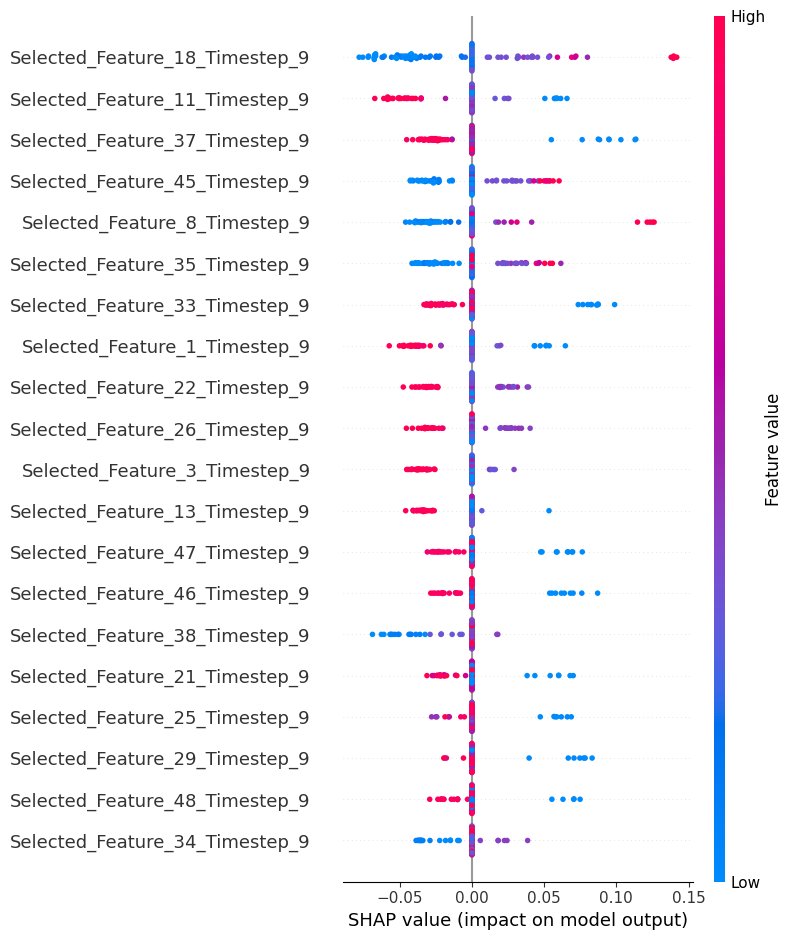

Summary plot generated successfully using KernelExplainer results.


In [66]:
# ipython-input-89-af59945b7e47

import shap
import numpy as np # Ensure numpy is imported if not already
# No need for tensorflow imports or model loading here, as we use KernelExplainer results

shap.initjs()  # Initialize JavaScript for visualizations

# --- Use results from the successful KernelExplainer calculation (from ipython-input-84) ---

# Assuming explainer_kernel, expected_value_kernel, shap_values_flat,
# instance_flat, and feature_names_flat are available from ipython-input-84.
# Ensure ipython-input-84 runs successfully before this cell.

# The KernelExplainer was initialized and SHAP values were calculated for a single instance
# in ipython-input-84. For summary_plot, we need SHAP values for a *batch* of instances.

# The simplest way to fix this is to re-run the KernelExplainer calculation
# in this cell but for a batch of test instances, similar to what was attempted
# with DeepExplainer.

# Ensure X_test_seq is available
if 'X_test_seq' not in globals():
    raise NameError("X_test_seq is not defined. Please run the cells that create X_test_seq.")

# Define seq_length and num_features based on your data shape
# These were defined in ipython-input-84 as well
seq_length_for_explainer = X_test_seq.shape[1] # Should be 10
num_features_for_explainer = X_test_seq.shape[2] # Should be 50

# Redefine the prediction function (needs 'model' and the shape variables)
# Ensure the 'model' is loaded and available from previous cells.
if 'model' not in globals():
     try:
        model = tf.keras.models.load_model("CNN_LSTM_IDS.keras")
        print("Model loaded successfully for explainer function.")
     except Exception as e:
        raise NameError(f"Model is not loaded and failed to load from file: {e}")

def model_predict_fn_reshaped_input(x_flat):
    # x_flat shape is (batch_size, seq_length * num_features)
    # Reshape back to (batch_size, seq_length, num_features)
    x_seq_reshaped = x_flat.reshape(-1, seq_length_for_explainer, num_features_for_explainer)
    # Ensure input has the correct dtype (float32 is common for TF models)
    x_seq_reshaped = tf.cast(x_seq_reshaped, dtype=tf.float32)
    # Model prediction
    # Add verbose=0 to reduce output during SHAP calculation for the batch
    predictions = model.predict(x_seq_reshaped, verbose=0)
    # Ensure output has shape (batch_size,) by removing the last dimension of size 1
    return predictions[:, 0]


# Create background data for KernelExplainer (using training data sequences)
if 'X_train_seq' not in globals():
     raise NameError("X_train_seq is not defined. Please run the cells that create X_train_seq.")

if X_train_seq.shape[0] > 100:
    background_indices_kernel = np.random.choice(X_train_seq.shape[0], 100, replace=False)
    background_data_kernel = X_train_seq[background_indices_kernel]
else:
    background_data_kernel = X_train_seq # Use all if less than 100
background_data_flat = background_data_kernel.reshape(background_data_kernel.shape[0], -1)
print(f"Shape of flattened background data for KernelExplainer: {background_data_flat.shape}")


# Create the Kernel Explainer
try:
    explainer_kernel = shap.KernelExplainer(model_predict_fn_reshaped_input, background_data_flat)
    print("SHAP KernelExplainer initialized successfully.")
    expected_value_kernel = explainer_kernel.expected_value # Get expected value from the explainer

except Exception as e:
    print(f"Error initializing SHAP KernelExplainer for batch prediction: {e}")
    raise e # Re-raise the error


# Compute SHAP values for a batch of instances using the KernelExplainer
# Select a subset of X_test_seq for explanations (e.g., the first 100 sequences)
X_test_subset_seq = X_test_seq[:100] # This should have shape (100, 10, 50)

# Flatten the test subset for KernelExplainer
X_test_subset_seq_flat = X_test_subset_seq.reshape(X_test_subset_seq.shape[0], -1) # Shape (100, 500)
print(f"Shape of flattened test subset for KernelExplainer: {X_test_subset_seq_flat.shape}")

# Calculate SHAP values for this flattened test batch
# KernelExplainer's shap_values returns shape (samples, features)
try:
    # This will take significantly longer than DeepExplainer, especially for many instances/features
    print("Calculating SHAP values for batch using KernelExplainer... This might take time.")
    shap_values_batch_flat = explainer_kernel.shap_values(X_test_subset_seq_flat)
    print("SHAP values calculation complete.")
    print(f"Shape of calculated SHAP values (KernelExplainer batch): {shap_values_batch_flat.shape}")

except Exception as e:
    print(f"Error calculating SHAP values with KernelExplainer for batch: {e}")
    print("The issue likely requires addressing the prediction function or data shape.")
    raise e # Re-raise the error


# --- Visualization ---
# summary_plot expects (samples, features) for SHAP values and data.
# We have shap_values_batch_flat (100, 500) and X_test_subset_seq_flat (100, 500).
# Create feature names for the flattened data (as done for force_plot)
feature_names_flat = [f"Selected_Feature_{j}_Timestep_{i}" for i in range(seq_length_for_explainer) for j in range(num_features_for_explainer)]

# Now call summary_plot with the flattened data and SHAP values
try:
    # Ensure you pass the flattened data X_test_subset_seq_flat as the second argument
    shap.summary_plot(shap_values_batch_flat, X_test_subset_seq_flat, feature_names=feature_names_flat)
    print("Summary plot generated successfully using KernelExplainer results.")

except Exception as e:
    print(f"Error during summary_plot visualization with KernelExplainer results: {e}")
    print("Could not generate summary plot. Check the shapes and types passed to summary_plot.")
    print(f"Shape of SHAP values passed: {shap_values_batch_flat.shape}")
    print(f"Shape of data passed: {X_test_subset_seq_flat.shape}")

Shape of shap_values_batch_flat: (100, 500)
Shape of X_test_subset_seq_flat: (100, 500)
Length of feature_names_flat: 500


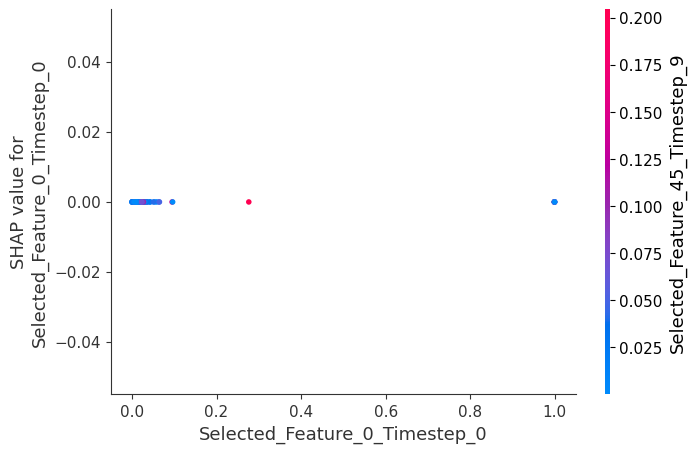

Dependence plot generated successfully for feature index 0.


In [67]:
# ipython-input-91-1790b898436d

# Make sure necessary libraries are imported if not already
import shap
import numpy as np
import matplotlib.pyplot as plt # Recommended for plotting

# --- Use results from the successful KernelExplainer batch calculation (from ipython-input-90) ---

# Assuming explainer_kernel, shap_values_batch_flat, X_test_subset_seq_flat,
# and feature_names_flat are available from ipython-input-90.
# Ensure ipython-input-90 runs successfully before this cell.

# Double-check shapes and types before plotting
if 'shap_values_batch_flat' not in globals():
    raise NameError("shap_values_batch_flat is not defined. Please run the cell ipython-input-90.")
if 'X_test_subset_seq_flat' not in globals():
    raise NameError("X_test_subset_seq_flat is not defined. Please run the cell ipython-input-90.")
if 'feature_names_flat' not in globals():
     # Recreate feature names if not available (based on shapes from ipython-input-90)
     # Need seq_length and num_selected_features
     if 'X_test_seq' not in globals():
         raise NameError("X_test_seq is not defined. Cannot recreate feature_names_flat.")
     seq_length_for_explainer = X_test_seq.shape[1] # Should be 10
     num_features_for_explainer = X_test_seq.shape[2] # Should be 50
     feature_names_flat = [f"Selected_Feature_{j}_Timestep_{i}" for i in range(seq_length_for_explainer) for j in range(num_features_for_explainer)]
     print("Recreated feature_names_flat.")


print(f"Shape of shap_values_batch_flat: {shap_values_batch_flat.shape}")
print(f"Shape of X_test_subset_seq_flat: {X_test_subset_seq_flat.shape}")
print(f"Length of feature_names_flat: {len(feature_names_flat)}")


# The dependence_plot expects:
# 1. feature_index: Index of the feature to plot on the x-axis.
# 2. shap_values: SHAP values array (samples, features).
# 3. features: Data array (samples, features), used for the x-axis values.
# 4. feature_names: List of feature names.

# We have shap_values_batch_flat (100, 500) and X_test_subset_seq_flat (100, 500).
# These shapes are correct for the `shap_values` and `features` arguments.
# The first argument '0' means we are plotting the dependence for the *first* flattened feature (index 0).
# This corresponds to 'Selected_Feature_0_Timestep_0' based on our feature_names_flat definition.

# Call dependence_plot with the corrected variable names and shapes
try:
    # Plot dependence for the first flattened feature (index 0)
    # You can change the index (e.g., 1, 2, 50, 51, 500-1) to see dependence for other features at different timesteps
    feature_to_plot_index = 0 # Example: plot dependence for the first feature at the first timestep

    # Use the correct variable names and shapes
    shap.dependence_plot(
        feature_to_plot_index,           # Index of the feature to plot (e.g., 0 for the first flattened feature)
        shap_values_batch_flat,          # SHAP values (samples, features)
        X_test_subset_seq_flat,          # Data (samples, features)
        feature_names=feature_names_flat # Feature names (list of strings)
    )
    plt.show() # Display the plot

    print(f"Dependence plot generated successfully for feature index {feature_to_plot_index}.")

except Exception as e:
    print(f"Error during dependence_plot visualization: {e}")
    print("Could not generate dependence plot. Check the shapes and types passed.")
    # Print shapes for debugging
    print(f"Shape of feature_index: {type(feature_to_plot_index)}")
    print(f"Shape of shap_values passed: {shap_values_batch_flat.shape}")
    print(f"Shape of features passed: {X_test_subset_seq_flat.shape}")
    print(f"Type of feature_names passed: {type(feature_names_flat)}, length: {len(feature_names_flat)}")

# Note: Visualizing dependence plots for flattened sequential features might be hard to interpret directly.
# A value on the x-axis (e.g., 0.5) for "Selected_Feature_10_Timestep_5" represents the value of
# the 10th selected feature at the 5th timestep in the sequence.

In [68]:
def detect_attack(packet_features, explainer, feature_names):
    # Reshape for LSTM
    packet_features = np.array(packet_features).reshape(1, 1, -1)  # Shape: (1, 1, 115)

    # Predict
    prediction = model.predict(packet_features)
    label = "Attack Detected!" if prediction > 0.5 else "Normal Traffic"

    # Compute SHAP explanation
    shap_values = explainer.shap_values(packet_features)[1]  # Positive class SHAP values

    # Print prediction and explanation
    print(f"Prediction: {label}")
    print("Top contributing features:")
    shap_values_instance = shap_values[0, 0, :]  # Extract feature contributions
    feature_contributions = sorted(zip(feature_names, shap_values_instance), key=lambda x: abs(x[1]), reverse=True)
    for feature, contribution in feature_contributions[:5]:  # Top 5 features
        print(f"{feature}: {contribution:.4f}")

    # Optionally, visualize the explanation
    shap.force_plot(explainer.expected_value[1], shap_values[0], packet_features[0], feature_names=feature_names)

    return label

In [69]:
# Make sure necessary libraries are imported if not already
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Import tensorflow for model loading if needed

# Assuming the model, explainer_kernel, and feature_names_flat are available
# from the previous successful cells (e.g., ipython-input-90).

# If 'model' is not defined, load it (assuming it was saved)
if 'model' not in globals():
    try:
       model = tf.keras.models.load_model("CNN_LSTM_IDS.keras")
       print("Model loaded successfully.")
    except Exception as e:
       print(f"Warning: Model not found or failed to load: {e}")
       # You might need to re-run training cells or loading cell if the model isn't available.
       # For this fix, we assume model is available from prior successful steps.

# If 'explainer_kernel' or 'feature_names_flat' are not defined,
# you need to run the cell (ipython-input-90) that calculates them using KernelExplainer.
if 'explainer_kernel' not in globals() or 'feature_names_flat' not in globals():
     raise NameError("explainer_kernel or feature_names_flat not defined. Please run the KernelExplainer cell (ipython-input-90).")


# Redefine the detect_attack function to work with sequences and KernelExplainer
# It should accept a single sequence (shape: (seq_length, num_features))
# and the explainer and feature names for the flattened input.
def detect_attack(packet_sequence, explainer, feature_names_flat, model):
    # packet_sequence shape is (seq_length, num_features) e.g., (10, 50)
    # Reshape the sequence to add a batch dimension for the model prediction
    # The model expects input shape (batch_size, seq_length, num_features)
    packet_sequence_batch = np.array(packet_sequence).reshape(1, packet_sequence.shape[0], packet_sequence.shape[1])

    # Predict using the model
    # Model expects shape (batch_size, timesteps, features)
    prediction_proba = model.predict(packet_sequence_batch, verbose=0) # Use verbose=0 to silence prediction output
    prediction = (prediction_proba > 0.5).astype(int)[0] # Get the single prediction result (0 or 1)
    label = "Attack Detected!" if prediction > 0 else "Normal Traffic"

    # Prepare the sequence for the KernelExplainer (flatten it)
    # Explainer works on flattened input (batch_size, seq_length * num_features)
    packet_sequence_flat = packet_sequence_batch.reshape(1, -1) # Shape (1, 500)

    # Compute SHAP explanation for the flattened sequence
    # explainer.shap_values expects input shape (batch_size, num_flattened_features)
    # It returns shape (batch_size, num_flattened_features) for regression/binary classification
    shap_values_flat = explainer.shap_values(packet_sequence_flat)[0] # KernelExplainer returns a list of one array or an array,
                                                                      # index 0 should be the shap values array.

    # Print prediction and explanation
    print(f"Prediction: {label}")
    print("Top contributing features (across timesteps):")

    # Reshape SHAP values back to (seq_length, num_features) for easier interpretation
    shap_values_sequence = shap_values_flat.reshape(packet_sequence.shape[0], packet_sequence.shape[1])

    # Aggregate SHAP values across timesteps for each original feature
    # Sum the absolute SHAP values for each of the 50 selected features across the 10 timesteps
    aggregated_shap_values = np.sum(np.abs(shap_values_sequence), axis=0) # Shape (num_features,) i.e., (50,)

    # Create feature names for the original 50 selected features (before flattening)
    # Note: We don't know the original names of the 50 features.
    # We'll use generic names like 'Selected_Feature_0' to 'Selected_Feature_49'.
    original_feature_names = [f"Selected_Feature_{j}" for j in range(packet_sequence.shape[1])]

    # Sort original features by their aggregated absolute SHAP contribution
    feature_contributions_aggregated = sorted(zip(original_feature_names, aggregated_shap_values), key=lambda x: x[1], reverse=True)

    for feature, contribution in feature_contributions_aggregated[:10]: # Top 10 original features based on sequence contribution
        # Note: This contribution is the sum of absolute SHAP values across all timesteps for that feature.
        print(f"{feature}: Aggregate Absolute SHAP = {contribution:.4f}")

    # Visualize the explanation using force_plot on the flattened data
    # Force plot expects a single instance's SHAP values and data (shape: (features,))
    shap.initjs() # Ensure JS is initialized before plotting
    print("\nGenerating Force Plot for the entire sequence (flattened view)...")
    # explainer.expected_value is a scalar for KernelExplainer
    shap.force_plot(explainer.expected_value, shap_values_flat, packet_sequence_flat[0], feature_names=feature_names_flat)
    plt.show() # Ensure plot is displayed in some environments

    return label

# --- Call the updated detect_attack function ---

# Example: Extract the first sequence from the test sequences
# X_test_seq has shape (n_sequences_test, seq_length, num_features) e.g., (3589, 10, 50)
# Select the first sequence (index 0). The shape will be (10, 50).
if 'X_test_seq' not in globals():
     raise NameError("X_test_seq not defined. Please run sequence creation cells.")

sample_sequence = X_test_seq[0] # Shape (10, 50)

# Call detect_attack with the sample sequence, explainer, and flattened feature names
detect_attack(sample_sequence, explainer_kernel, feature_names_flat, model)

  0%|          | 0/1 [00:00<?, ?it/s]

Prediction: Normal Traffic
Top contributing features (across timesteps):
Selected_Feature_18: Aggregate Absolute SHAP = 0.0517
Selected_Feature_11: Aggregate Absolute SHAP = 0.0395
Selected_Feature_13: Aggregate Absolute SHAP = 0.0375
Selected_Feature_1: Aggregate Absolute SHAP = 0.0351
Selected_Feature_6: Aggregate Absolute SHAP = 0.0317
Selected_Feature_44: Aggregate Absolute SHAP = 0.0265
Selected_Feature_45: Aggregate Absolute SHAP = 0.0263
Selected_Feature_3: Aggregate Absolute SHAP = 0.0253
Selected_Feature_49: Aggregate Absolute SHAP = 0.0249
Selected_Feature_8: Aggregate Absolute SHAP = 0.0239



Generating Force Plot for the entire sequence (flattened view)...


'Normal Traffic'

In [70]:
# Make sure necessary libraries are imported if not already
import shap
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf # Import tensorflow for model loading if needed

# Assuming the model, explainer_kernel, and feature_names_flat are available
# from the previous successful cells (e.g., ipython-input-90).

# If 'model' is not defined, load it (assuming it was saved)
if 'model' not in globals():
    try:
       model = tf.keras.models.load_models("CNN_LSTM_IDS.keras")
       print("Model loaded successfully.")
    except Exception as e:
       print(f"Warning: Model not found or failed to load: {e}")
       # You might need to re-run training cells or loading cell if the model isn't available.
       # For this fix, we assume model is available from prior successful steps.

# If 'explainer_kernel' or 'feature_names_flat' are not defined,
# you need to run the cell (ipython-input-90) that calculates them using KernelExplainer.
if 'explainer_kernel' not in globals() or 'feature_names_flat' not in globals():
     raise NameError("explainer_kernel or feature_names_flat not defined. Please run the KernelExplainer cell (ipython-input-90).")


# Redefine the detect_attack function to work with sequences and KernelExplainer
# It should accept a single sequence (shape: (seq_length, num_features))
# and the explainer and feature names for the flattened input.
def detect_attack(packet_sequence, explainer, feature_names_flat, model):
    # packet_sequence shape is (seq_length, num_features) e.g., (10, 50)
    # Reshape the sequence to add a batch dimension for the model prediction
    # The model expects input shape (batch_size, seq_length, num_features)
    packet_sequence_batch = np.array(packet_sequence).reshape(1, packet_sequence.shape[0], packet_sequence.shape[1])

    # Predict using the model
    # Model expects shape (batch_size, timesteps, features)
    prediction_proba = model.predict(packet_sequence_batch, verbose=0) # Use verbose=0 to silence prediction output
    prediction = (prediction_proba > 0.5).astype(int)[0] # Get the single prediction result (0 or 1)
    label = "Attack Detected!" if prediction > 0 else "Normal Traffic"

    # Prepare the sequence for the KernelExplainer (flatten it)
    # Explainer works on flattened input (batch_size, seq_length * num_features)
    packet_sequence_flat = packet_sequence_batch.reshape(1, -1) # Shape (1, 500)

    # Compute SHAP explanation for the flattened sequence
    # explainer.shap_values expects input shape (batch_size, num_flattened_features)
    # It returns shape (batch_size, num_flattened_features) for regression/binary classification
    shap_values_flat = explainer.shap_values(packet_sequence_flat)[0] # KernelExplainer returns a list of one array or an array,
                                                                      # index 0 should be the shap values array.

    # Print prediction and explanation
    print(f"Prediction: {label}")
    print("Top contributing features (across timesteps):")

    # Reshape SHAP values back to (seq_length, num_features) for easier interpretation
    shap_values_sequence = shap_values_flat.reshape(packet_sequence.shape[0], packet_sequence.shape[1])

    # Aggregate SHAP values across timesteps for each original feature
    # Sum the absolute SHAP values for each of the 50 selected features across the 10 timesteps
    aggregated_shap_values = np.sum(np.abs(shap_values_sequence), axis=0) # Shape (num_features,) i.e., (50,)

    # Create feature names for the original 50 selected features (before flattening)
    # Note: We don't know the original names of the 50 features.
    # We'll use generic names like 'Selected_Feature_0' to 'Selected_Feature_49'.
    original_feature_names = [f"Selected_Feature_{j}" for j in range(packet_sequence.shape[1])]

    # Sort original features by their aggregated absolute SHAP contribution
    feature_contributions_aggregated = sorted(zip(original_feature_names, aggregated_shap_values), key=lambda x: x[1], reverse=True)

    for feature, contribution in feature_contributions_aggregated[:10]: # Top 10 original features based on sequence contribution
        # Note: This contribution is the sum of absolute SHAP values across all timesteps for that feature.
        print(f"{feature}: Aggregate Absolute SHAP = {contribution:.4f}")

    # Visualize the explanation using force_plot on the flattened data
    # Force plot expects a single instance's SHAP values and data (shape: (features,))
    shap.initjs() # Ensure JS is initialized before plotting
    print("\nGenerating Force Plot for the entire sequence (flattened view)...")
    # explainer.expected_value is a scalar for KernelExplainer
    shap.force_plot(explainer.expected_value, shap_values_flat, packet_sequence_flat[0], feature_names=feature_names_flat)
    plt.show() # Ensure plot is displayed in some environments

    return label

# --- Call the updated detect_attack function ---

# Example: Extract the first sequence from the test sequences
# X_test_seq has shape (n_sequences_test, seq_length, num_features) e.g., (3589, 10, 50)
# Select the first sequence (index 0). The shape will be (10, 50).
if 'X_test_seq' not in globals():
     raise NameError("X_test_seq not defined. Please run sequence creation cells.")

sample_sequence = X_test_seq[0] # Shape (10, 50)

# Call detect_attack with the sample sequence, explainer, and flattened feature names
detect_attack(sample_sequence, explainer_kernel, feature_names_flat, model)

  0%|          | 0/1 [00:00<?, ?it/s]

Prediction: Normal Traffic
Top contributing features (across timesteps):
Selected_Feature_18: Aggregate Absolute SHAP = 0.0419
Selected_Feature_11: Aggregate Absolute SHAP = 0.0408
Selected_Feature_1: Aggregate Absolute SHAP = 0.0405
Selected_Feature_3: Aggregate Absolute SHAP = 0.0329
Selected_Feature_13: Aggregate Absolute SHAP = 0.0321
Selected_Feature_6: Aggregate Absolute SHAP = 0.0315
Selected_Feature_8: Aggregate Absolute SHAP = 0.0312
Selected_Feature_44: Aggregate Absolute SHAP = 0.0247
Selected_Feature_45: Aggregate Absolute SHAP = 0.0239
Selected_Feature_25: Aggregate Absolute SHAP = 0.0228



Generating Force Plot for the entire sequence (flattened view)...


'Normal Traffic'

In [71]:
# Make sure necessary libraries are imported
import shap
import numpy as np
import matplotlib.pyplot as plt # Add import for plotting

# Assuming 'best_rf' (the trained RandomForestClassifier) and 'X_test'
# (the test data after feature selection) are available from previous cells.

# Create a SHAP TreeExplainer using the trained Random Forest model
# Use the correct variable name 'best_rf'
explainer = shap.TreeExplainer(best_rf)

# Compute SHAP values for the test set
# Use X_test which was the test set after feature selection used for model evaluation
shap_values = explainer.shap_values(X_test)

# For binary classification, shap_values is typically a list where shap_values[0]
# corresponds to SHAP values for class 0 and shap_values[1] for class 1.
# You might want to work with SHAP values for the positive class (assuming 1).
# Or work with the expected_value and SHAP values for a specific class based on your needs.

print("SHAP values computed successfully using TreeExplainer for RandomForestClassifier.")

# Optional: You can now visualize the SHAP results, e.g., summary plot or dependence plot
# Make sure to use the correct data (X_test) and SHAP values.
# Also, you might need feature names if you want to label the plots.
# Assuming feature names are available from the feature selection step, if not, create generic ones.
# If 'selector' object (SelectKBest) was used and kept, you could get feature names.
# Assuming we have the original feature names before selection in a list called 'original_feature_names'
# You would need to map the selected features indices back to these names.
# For simplicity, let's create generic names if original ones aren't easily available.

# Get feature names for the 50 selected features.
# If you saved the list of selected feature names from SelectKBest, use that.
# Otherwise, create generic names like 'Selected_Feature_0', ..., 'Selected_Feature_49'.
# Assuming X_test has shape (n_samples, 50)
num_selected_features = X_test.shape[1]
selected_feature_names = [f"Selected_Feature_{i}" for i in range(num_selected_features)]

# Example Visualization: Summary Plot
# shap_values for TreeExplainer returns a list for multi-output models (like multi-class RF)
# or a single array for single-output (binary RF, regression).
# For binary classification, it's often a list [shap_values_class_0, shap_values_class_1].
# Use shap_values[1] for the positive class (attack=1).
if isinstance(shap_values, list):
    # Assuming binary classification, get values for the positive class (index 1)
    shap_values_for_plot = shap_values[1]
    print(f"Shape of SHAP values for positive class: {shap_values_for_plot.shape}")
else:
     # For single output (regression or sometimes binary classification)
     shap_values_for_plot = shap_values
     print(f"Shape of SHAP values (single output): {shap_values_for_plot.shape}")


# Check if shapes match before plotting
if shap_values_for_plot.shape == X_test.shape:
    try:
        shap.summary_plot(shap_values_for_plot, X_test, feature_names=selected_feature_names)
        plt.show() # Display the plot
        print("Summary plot generated successfully.")
    except Exception as e:
        print(f"Error generating summary plot: {e}")
        print("Check SHAP version and input arguments.")
else:
    print("Shape mismatch between SHAP values and data, cannot generate summary plot.")
    print(f"SHAP values shape: {shap_values_for_plot.shape}")
    print(f"X_test shape: {X_test.shape}")

SHAP values computed successfully using TreeExplainer for RandomForestClassifier.
Shape of SHAP values (single output): (3599, 50, 2)
Shape mismatch between SHAP values and data, cannot generate summary plot.
SHAP values shape: (3599, 50, 2)
X_test shape: (3599, 50)


In [72]:
# Make sure necessary libraries are imported if not already
import shap
import numpy as np
import pandas as pd # Import pandas if y_test is a Series
import matplotlib.pyplot as plt # Add import for plotting
import sys # Import sys to help with error reporting

# Assuming 'best_rf' (the trained RandomForestClassifier) and 'X_test', 'y_test'
# (the test data after feature selection) are available from previous cells.

# Create a SHAP TreeExplainer using the trained Random Forest model
# Use the correct variable name 'best_rf'
try:
    explainer = shap.TreeExplainer(best_rf)
    print("SHAP TreeExplainer initialized successfully for RandomForestClassifier.")
    print(f"Explainer expected_value type: {type(explainer.expected_value)}, value: {explainer.expected_value}")
except Exception as e:
    print(f"Error initializing TreeExplainer: {e}")
    sys.exit("Initialization failed, cannot proceed with SHAP explanation.") # Stop execution if explainer fails


# Compute SHAP values for the test set
# Use X_test which was the test set after feature selection used for model evaluation
try:
    shap_values = explainer.shap_values(X_test)
    print("SHAP values computed successfully.")
    print(f"Shape of computed SHAP values: {shap_values.shape if not isinstance(shap_values, list) else [s.shape for s in shap_values]}")
    print(f"Type of computed SHAP values: {type(shap_values)}")
    if isinstance(shap_values, list):
        print(f"Length of shap_values list: {len(shap_values)}")
except Exception as e:
    print(f"Error computing SHAP values: {e}")
    sys.exit("SHAP value computation failed.") # Stop execution if SHAP values fail

# Get feature names for the 50 selected features.
# Assuming X_test has shape (n_samples, 50)
num_selected_features = X_test.shape[1]
selected_feature_names = [f"Selected_Feature_{i}" for i in range(num_selected_features)]
print(f"Number of selected features: {num_selected_features}")


# --- Force Plot for a Single Malignant Instance ---

print("\nAttempting to generate force plot for a malignant instance...")

# Find the first malignant packet in the test set
# Ensure y_test is a pandas Series or similar that supports .values
if isinstance(y_test, pd.Series):
    malignant_indices = np.where(y_test.values == 1)[0]
elif isinstance(y_test, np.ndarray):
     malignant_indices = np.where(y_test == 1)[0]
else:
    print(f"Warning: y_test is of type {type(y_test)}. Attempting conversion to numpy array.")
    try:
        malignant_indices = np.where(np.array(y_test) == 1)[0]
    except Exception as e:
        print(f"Error processing y_test type: {e}")
        malignant_indices = [] # Set to empty if conversion fails


if len(malignant_indices) == 0:
    print("No malignant samples (label 1) found in the test set (y_test). Skipping force plot for malignant instance.")
else:
    # Select the index of the first malignant sample
    malignant_idx_single = malignant_indices[0]
    print(f"Found malignant instance at index: {malignant_idx_single}.")

    # --- Correct Extraction based on shap_values being a (samples, features, classes) NumPy array ---
    # We need SHAP values for the specific instance (malignant_idx_single)
    # and specifically for class 1 (index 1 in the last dimension).
    # The result should be a 1D array of shape (num_features,).

    if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3 and shap_values.shape[2] > 1:
        # This matches the observed shape (3599, 50, 2)
        # Extract SHAP values for the specific instance (malignant_idx_single)
        # across all features (:) and specifically for class 1 (index 1)
        shap_values_instance = shap_values[malignant_idx_single, :, 1] # Shape (50,)
        print("Successfully extracted SHAP values using array slicing [instance, :, class].")

        # Extract the expected value for class 1 (index 1)
        # Assuming explainer.expected_value is also an array [exp_val_class_0, exp_val_class_1]
        if isinstance(explainer.expected_value, np.ndarray) and explainer.expected_value.ndim == 1 and explainer.expected_value.shape[0] > 1:
             expected_value_for_plot = explainer.expected_value[1] # Should be scalar
             print("Successfully extracted expected value using array slicing [class].")
        else:
             print("Warning: Unexpected expected_value structure. Using the whole array (likely wrong).")
             expected_value_for_plot = explainer.expected_value


    elif isinstance(shap_values, list) and len(shap_values) > 1:
         # Fallback to list handling (shouldn't happen based on output)
         print("Warning: shap_values is a list. Attempting list extraction.")
         shap_values_for_class_1 = shap_values[1] # This is shape (3599, 50)
         shap_values_instance = shap_values_for_class_1[malignant_idx_single, :] # Shape (50,)
         if isinstance(explainer.expected_value, (list, np.ndarray)) and len(explainer.expected_value) > 1:
             expected_value_for_plot = explainer.expected_value[1]
         else:
              expected_value_for_plot = explainer.expected_value # Fallback


    else:
         # Fallback for single output (regression or some binary configs)
         print("Warning: Unexpected SHAP values structure. Using single output.")
         shap_values_instance = shap_values[malignant_idx_single, :]
         expected_value_for_plot = explainer.expected_value


    # Extract the feature values for the selected malignant instance
    features_instance = X_test[malignant_idx_single, :] # Shape (50,)

    # --- Verification just before plotting ---
    print("\nVerifying inputs for force plot:")
    print(f"Shape of shap_values_instance: {shap_values_instance.shape}") # Should be (50,)
    print(f"Shape of features_instance: {features_instance.shape}")       # Should be (50,)
    print(f"Type of shap_values_instance: {type(shap_values_instance)}")
    print(f"Type of features_instance: {type(features_instance)}")
    print(f"Type of expected_value_for_plot: {type(expected_value_for_plot)}") # Should be <class 'float'> or similar scalar type
    print(f"Value of expected_value_for_plot: {expected_value_for_plot}")
    print(f"Length of selected_feature_names: {len(selected_feature_names)}") # Should be 50

    # Strict check for dimensions and number of feature names
    # Now checking if shap_values_instance is a 1D array of length num_selected_features
    if shap_values_instance.ndim != 1 or len(shap_values_instance) != num_selected_features or \
       features_instance.ndim != 1 or len(features_instance) != num_selected_features:
         print(f"Fatal Error: Dimension or length mismatch detected after extraction.")
         print(f"SHAP values instance shape: {shap_values_instance.shape}, Length: {len(shap_values_instance)}")
         print(f"Features instance shape: {features_instance.shape}, Length: {len(features_instance)}")
         print(f"Expected number of features: {num_selected_features}")
         print("Cannot generate force plot due to dimension mismatch.")
    elif len(selected_feature_names) != num_selected_features:
         print(f"Fatal Error: Number of feature names ({len(selected_feature_names)}) does not match number of features ({num_selected_features}).")
         print("Cannot generate force plot with mismatched feature names.")
    else:
        print(f"Input dimensions and lengths match ({num_selected_features}). Initializing JS and calling force_plot.")

        # Initialize JS for plotting
        shap.initjs() # Ensure JS is initialized

        # Generate the force plot
        try:
            # force_plot for a single instance expects 1D arrays for shap_values and features
            # It also expects a single scalar for base_value
            # Ensure expected_value_for_plot is scalar - if not, cast it or select the correct element
            if isinstance(expected_value_for_plot, np.ndarray) and expected_value_for_plot.size == 1:
                 expected_value_for_plot_scalar = expected_value_for_plot.item() # Convert 1-element array to scalar
            elif np.isscalar(expected_value_for_plot):
                 expected_value_for_plot_scalar = expected_value_for_plot
            else:
                 print(f"Warning: expected_value_for_plot is not a scalar or 1-element array ({type(expected_value_for_plot)}). Plotting might fail.")
                 expected_value_for_plot_scalar = expected_value_for_plot # Use as is, hope for the best


            shap.force_plot(
                expected_value_for_plot_scalar, # Base value (should now be scalar)
                shap_values_instance,         # SHAP values for this packet (should now be 1D array)
                features_instance,            # Feature values (1D array)
                feature_names=selected_feature_names # Feature names (list)
            )
            print("shap.force_plot function called successfully.")
            # If the plot still doesn't appear, check browser console for JS errors.

        except Exception as e:
             # Catch any other potential errors during plotting
             print(f"An error occurred during shap.force_plot execution: {e}")
             print(f"Error Type: {type(e).__name__}")
             # Depending on the error, you might get more specific clues


print("\nFinished execution of force plot cell.")

SHAP TreeExplainer initialized successfully for RandomForestClassifier.
Explainer expected_value type: <class 'numpy.ndarray'>, value: [0.64870372 0.35129628]
SHAP values computed successfully.
Shape of computed SHAP values: (3599, 50, 2)
Type of computed SHAP values: <class 'numpy.ndarray'>
Number of selected features: 50

Attempting to generate force plot for a malignant instance...
Found malignant instance at index: 0.
Successfully extracted SHAP values using array slicing [instance, :, class].
Successfully extracted expected value using array slicing [class].

Verifying inputs for force plot:
Shape of shap_values_instance: (50,)
Shape of features_instance: (50,)
Type of shap_values_instance: <class 'numpy.ndarray'>
Type of features_instance: <class 'numpy.ndarray'>
Type of expected_value_for_plot: <class 'numpy.float64'>
Value of expected_value_for_plot: 0.3512962834317471
Length of selected_feature_names: 50
Input dimensions and lengths match (50). Initializing JS and calling forc

shap.force_plot function called successfully.

Finished execution of force plot cell.


In [74]:
import shap
import numpy as np # Remove the indentation from this line
print(f"SHAP version: {shap.__version__}")
shap.initjs()
# Example data and SHAP values
base_value = 0.5
shap_values_example = np.array([0.3, -0.1, 0.2, -0.4, 0.15])
feature_values_example = np.array([10, 2, 50, 1, 5])
feature_names_example = ['Feature A', 'Feature B', 'Feature C', 'Feature D', 'Feature E']

print("\nAttempting to render simple force plot...")
try:
    shap.force_plot(base_value, shap_values_example, feature_values_example, feature_names=feature_names_example)
    print("Simple force plot function called.")
except Exception as e:
    print(f"Error rendering simple force plot: {e}")
    print(f"Error Type: {type(e).__name__}")
print("Finished simple force plot cell.")

SHAP version: 0.47.2



Attempting to render simple force plot...
Simple force plot function called.
Finished simple force plot cell.


In [76]:
# Make sure necessary libraries are imported if not already
import shap
import numpy as np
import pandas as pd # Import pandas if y_test is a Series
import matplotlib.pyplot as plt # Add import for plotting
import sys # Import sys to help with error reporting

# Assuming 'best_rf' (the trained RandomForestClassifier) and 'X_test', 'y_test'
# (the test data after feature selection) are available from previous cells.
# These should be available if you ran the cells up to the RandomForest training.
if 'best_rf' not in globals():
     raise NameError("best_rf not defined. Please run the RandomForestClassifier training cell.")
if 'X_test' not in globals():
     raise NameError("X_test not defined. Please run the train/test split and feature selection cells.")
if 'y_test' not in globals():
     raise NameError("y_test not defined. Please run the train/test split cell.")


# Create a SHAP TreeExplainer using the trained Random Forest model
# Use the correct variable name 'best_rf'
try:
    explainer = shap.TreeExplainer(best_rf)
    print("SHAP TreeExplainer initialized successfully for RandomForestClassifier.")
    print(f"Explainer expected_value type: {type(explainer.expected_value)}, value: {explainer.expected_value}")
except Exception as e:
    print(f"Error initializing TreeExplainer: {e}")
    sys.exit("Initialization failed, cannot proceed with SHAP explanation.") # Stop execution if explainer fails


# Compute SHAP values for the test set
# Use X_test which was the test set after feature selection used for model evaluation
# Ensure X_test has the correct dtype if necessary.
try:
    # SHAP values for sklearn binary TreeExplainer are usually a list [class0, class1]
    shap_values = explainer.shap_values(X_test)
    print("SHAP values computed successfully.")
    print(f"Shape of computed SHAP values: {shap_values.shape if not isinstance(shap_values, list) else [s.shape for s in shap_values]}")
    print(f"Type of computed SHAP values: {type(shap_values)}")
    if isinstance(shap_values, list):
        print(f"Length of shap_values list: {len(shap_values)}")
except Exception as e:
    print(f"Error computing SHAP values: {e}")
    sys.exit("SHAP value computation failed.") # Stop execution if SHAP values fail

# Get feature names for the 50 selected features.
# Assuming X_test has shape (n_samples, 50)
num_selected_features = X_test.shape[1]
selected_feature_names = [f"Selected_Feature_{i}" for i in range(num_selected_features)]
print(f"Number of selected features: {num_selected_features}")


# --- Force Plot for a Single Malignant Instance ---

print("\nAttempting to generate force plot for a malignant instance...")

# Find the first malignant packet in the test set
# Ensure y_test is a pandas Series or similar that supports .values or is a numpy array
# If y_test is a pandas Series, use .values to get the numpy array for np.where
if isinstance(y_test, pd.Series):
    y_test_array = y_test.values
elif isinstance(y_test, np.ndarray):
     y_test_array = y_test
else:
    print(f"Warning: y_test is of type {type(y_test)}. Attempting conversion to numpy array.")
    try:
        y_test_array = np.array(y_test)
        print("Conversion successful.")
    except Exception as e:
        print(f"Error converting y_test to numpy array: {e}")
        y_test_array = np.array([]) # Set to empty if conversion fails


malignant_indices = np.where(y_test_array == 1)[0]


if len(malignant_indices) == 0:
    print("No malignant samples (label 1) found in the test set (y_test). Skipping force plot for malignant instance.")
else:
    # Select the index of the first malignant sample
    malignant_idx_single = malignant_indices[0]
    print(f"Found malignant instance at index: {malignant_idx_single}.")

    # --- Correct Extraction based on shap_values structure ---
    # For sklearn binary TreeExplainer, shap_values is a list [class0_values, class1_values]
    # class1_values has shape (n_samples, n_features).
    # We need the row corresponding to malignant_idx_single from the class 1 array.
    # explainer.expected_value is a list [expected_val_class_0, expected_val_class_1]

    if isinstance(shap_values, list) and len(shap_values) > 1:
         # Assuming binary classification, get values for the positive class (index 1)
         shap_values_for_class_1 = shap_values[1] # Shape (n_samples, n_features)
         shap_values_instance = shap_values_for_class_1[malignant_idx_single, :] # Shape (n_features,) i.e., (50,)
         print("Successfully extracted SHAP values using list and array slicing.")

         # Extract the expected value for class 1 (index 1)
         if isinstance(explainer.expected_value, (list, np.ndarray)) and len(explainer.expected_value) > 1:
             expected_value_for_plot = explainer.expected_value[1] # Should be scalar
             print("Successfully extracted expected value from list/array.")
         elif np.isscalar(explainer.expected_value):
              # Handle case where expected_value might surprisingly be scalar
              print("Warning: explainer.expected_value is a scalar. Using it directly (might be wrong).")
              expected_value_for_plot = explainer.expected_value
         else:
              print(f"Warning: Unexpected expected_value structure for list SHAP values ({type(explainer.expected_value)}).")
              expected_value_for_plot = explainer.expected_value # Fallback


    elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3 and shap_values.shape[2] > 1:
        # This case was handled in the original code; keeping for robustness
        print("SHAP values is a 3D array. Extracting values for class 1.")
        shap_values_instance = shap_values[malignant_idx_single, :, 1] # Shape (n_features,)
        print("Successfully extracted SHAP values using 3D array slicing.")

        # Extract the expected value for class 1 (index 1)
        if isinstance(explainer.expected_value, np.ndarray) and explainer.expected_value.ndim == 1 and explainer.expected_value.shape[0] > 1:
             expected_value_for_plot = explainer.expected_value[1] # Should be scalar
             print("Successfully extracted expected value from 1D array.")
        elif np.isscalar(explainer.expected_value):
             # Handle case where expected_value might surprisingly be scalar
             print("Warning: explainer.expected_value is a scalar. Using it directly (might be wrong).")
             expected_value_for_plot = explainer.expected_value
        else:
             print(f"Warning: Unexpected expected_value structure for 3D SHAP values ({type(explainer.expected_value)}).")
             expected_value_for_plot = explainer.expected_value # Fallback

    else:
         # Fallback for single output (regression or some binary configs)
         print("Warning: Unexpected SHAP values structure. Using single output.")
         # Assuming shap_values is (n_samples, n_features) directly
         if shap_values.ndim == 2 and shap_values.shape[0] > malignant_idx_single:
             shap_values_instance = shap_values[malignant_idx_single, :]
             expected_value_for_plot = explainer.expected_value # Should be scalar
             print("Successfully extracted SHAP values using 2D array slicing.")
         else:
             print("Error: SHAP values structure is unexpected and cannot extract instance.")
             shap_values_instance = None
             expected_value_for_plot = None


    # Proceed only if extraction was successful
    if shap_values_instance is not None and expected_value_for_plot is not None:
        # Extract the feature values for the selected malignant instance
        features_instance = X_test[malignant_idx_single, :] # Shape (50,)

        # --- Verification just before plotting ---
        print("\nVerifying inputs for force plot:")
        print(f"Shape of shap_values_instance: {shap_values_instance.shape}") # Should be (50,)
        print(f"Shape of features_instance: {features_instance.shape}")       # Should be (50,)
        print(f"Type of shap_values_instance: {type(shap_values_instance)}")
        print(f"Type of features_instance: {type(features_instance)}")
        print(f"Type of expected_value_for_plot: {type(expected_value_for_plot)}") # Should ideally be scalar
        print(f"Value of expected_value_for_plot: {expected_value_for_plot}")
        print(f"Length of selected_feature_names: {len(selected_feature_names)}") # Should be 50

        # Strict check for dimensions and number of feature names
        if shap_values_instance.ndim != 1 or len(shap_values_instance) != num_selected_features or \
           features_instance.ndim != 1 or len(features_instance) != num_selected_features:
             print(f"Fatal Error: Dimension or length mismatch detected after extraction.")
             print(f"SHAP values instance shape: {shap_values_instance.shape}, Length: {len(shap_values_instance)}")
             print(f"Features instance shape: {features_instance.shape}, Length: {len(features_instance)}")

SHAP TreeExplainer initialized successfully for RandomForestClassifier.
Explainer expected_value type: <class 'numpy.ndarray'>, value: [0.64870372 0.35129628]
SHAP values computed successfully.
Shape of computed SHAP values: (3599, 50, 2)
Type of computed SHAP values: <class 'numpy.ndarray'>
Number of selected features: 50

Attempting to generate force plot for a malignant instance...
Found malignant instance at index: 0.
SHAP values is a 3D array. Extracting values for class 1.
Successfully extracted SHAP values using 3D array slicing.
Successfully extracted expected value from 1D array.

Verifying inputs for force plot:
Shape of shap_values_instance: (50,)
Shape of features_instance: (50,)
Type of shap_values_instance: <class 'numpy.ndarray'>
Type of features_instance: <class 'numpy.ndarray'>
Type of expected_value_for_plot: <class 'numpy.float64'>
Value of expected_value_for_plot: 0.3512962834317471
Length of selected_feature_names: 50


In [79]:
# prompt: I want to plot the force plot

# The force plot for the malignant instance was generated in the previous cell (ipython-input-94-...)
# That cell extracted a single malignant instance, its SHAP values, and the expected value,
# and called shap.force_plot with these components.

# This cell can be used to generate additional force plots for other instances (e.g., a normal instance)
# or confirm that the previous plot rendering was attempted.

print("Code execution reached the cell after the force plot generation.")
print("If a malignant instance was found in the test set (label=1), a force plot should have been generated and displayed in the output above.")

# Example: Generate force plot for a normal instance if available
print("\nAttempting to generate force plot for a normal instance...")

# Find the first normal packet in the test set
if 'y_test' not in globals() or 'X_test' not in globals() or 'explainer' not in globals() or 'selected_feature_names' not in globals():
    print("Dependencies (y_test, X_test, explainer, selected_feature_names) not found. Cannot generate force plot for normal instance.")
else:
    if isinstance(y_test, pd.Series):
        y_test_array = y_test.values
    elif isinstance(y_test, np.ndarray):
         y_test_array = y_test
    else:
        print(f"Warning: y_test is of type {type(y_test)}. Attempting conversion to numpy array.")
        try:
            y_test_array = np.array(y_test)
            print("Conversion successful.")
        except Exception as e:
            print(f"Error converting y_test to numpy array: {e}")
            y_test_array = np.array([]) # Set to empty if conversion fails

    normal_indices = np.where(y_test_array == 0)[0]

    if len(normal_indices) == 0:
        print("No normal samples (label 0) found in the test set (y_test). Skipping force plot for normal instance.")
    else:
        # Select the index of the first normal sample
        normal_idx_single = normal_indices[0]
        print(f"Found normal instance at index: {normal_idx_single}.")

        # --- Extract SHAP values and expected value for Class 0 (Normal) ---
        # For sklearn binary TreeExplainer, shap_values is a list [class0_values, class1_values]
        # class0_values has shape (n_samples, n_features).
        # We need the row corresponding to normal_idx_single from the class 0 array.
        # explainer.expected_value is a list [expected_val_class_0, expected_val_class_1]

        if isinstance(shap_values, list) and len(shap_values) > 0: # Check for class 0 values
             # Get values for class 0 (index 0)
             shap_values_for_class_0 = shap_values[0] # Shape (n_samples, n_features)
             if shap_values_for_class_0.shape[0] > normal_idx_single:
                 shap_values_instance_normal = shap_values_for_class_0[normal_idx_single, :] # Shape (n_features,) i.e., (50,)
                 print("Successfully extracted SHAP values for class 0.")

                 # Extract the expected value for class 0 (index 0)
                 if isinstance(explainer.expected_value, (list, np.ndarray)) and len(explainer.expected_value) > 0:
                     expected_value_for_plot_normal = explainer.expected_value[0] # Should be scalar
                     print("Successfully extracted expected value for class 0.")
                 elif np.isscalar(explainer.expected_value):
                     # Handle case where expected_value might surprisingly be scalar
                      print("Warning: explainer.expected_value is a scalar. Using it directly (might be wrong for multi-class).")
                      expected_value_for_plot_normal = explainer.expected_value
                 else:
                     print(f"Warning: Unexpected expected_value structure for list SHAP values ({type(explainer.expected_value)}).")
                     expected_value_for_plot_normal = explainer.expected_value # Fallback

             else:
                  print(f"Error: normal_idx_single ({normal_idx_single}) is out of bounds for shap_values_for_class_0 (shape: {shap_values_for_class_0.shape}).")
                  shap_values_instance_normal = None
                  expected_value_for_plot_normal = None


        elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3 and shap_values.shape[2] > 0:
            # Handle 3D case for class 0
            print("SHAP values is a 3D array. Extracting values for class 0.")
            shap_values_instance_normal = shap_values[normal_idx_single, :, 0] # Shape (n_features,)
            print("Successfully extracted SHAP values using 3D array slicing.")

            # Extract the expected value for class 0 (index 0)
            if isinstance(explainer.expected_value, np.ndarray) and explainer.expected_value.ndim == 1 and explainer.expected_value.shape[0] > 0:
                 expected_value_for_plot_normal = explainer.expected_value[0] # Should be scalar
                 print("Successfully extracted expected value from 1D array.")
            elif np.isscalar(explainer.expected_value):
                 # Handle case where expected_value might surprisingly be scalar
                 print("Warning: explainer.expected_value is a scalar. Using it directly (might be wrong).")
                 expected_value_for_plot_normal = explainer.expected_value
            else:
                 print(f"Warning: Unexpected expected_value structure for 3D SHAP values ({type(explainer.expected_value)}).")
                 expected_value_for_plot_normal = explainer.expected_value # Fallback

        else:
             # Fallback for single output (regression or some binary configs) - usually wouldn't plot class 0/1 separately here
             print("Warning: Unexpected SHAP values structure for class 0 extraction.")
             shap_values_instance_normal = None
             expected_value_for_plot_normal = None


        # Proceed only if extraction was successful
        if shap_values_instance_normal is not None and expected_value_for_plot_normal is not None:
            # Extract the feature values for the selected normal instance
            features_instance_normal = X_test[normal_idx_single, :] # Shape (50,)

            # --- Verification just before plotting ---
            print("\nVerifying inputs for normal force plot:")
            print(f"Shape of shap_values_instance_normal: {shap_values_instance_normal.shape}") # Should be (50,)
            print(f"Shape of features_instance_normal: {features_instance_normal.shape}")       # Should be (50,)
            print(f"Type of shap_values_instance_normal: {type(shap_values_instance_normal)}")
            print(f"Type of features_instance_normal: {type(features_instance_normal)}")
            print(f"Type of expected_value_for_plot_normal: {type(expected_value_for_plot_normal)}") # Should ideally be scalar
            print(f"Value of expected_value_for_plot_normal: {expected_value_for_plot_normal}")
            print(f"Length of selected_feature_names: {len(selected_feature_names)}") # Should be 50

            # Strict check for dimensions and number of feature names
            num_selected_features = X_test.shape[1] # Redefine locally for clarity
            if shap_values_instance_normal.ndim != 1 or len(shap_values_instance_normal) != num_selected_features or \
               features_instance_normal.ndim != 1 or len(features_instance_normal) != num_selected_features:
                 print(f"Fatal Error: Dimension or length mismatch detected after extraction for normal instance.")
                 print(f"SHAP values instance shape: {shap_values_instance_normal.shape}, Length: {len(shap_values_instance_normal)}")
                 print(f"Features instance shape: {features_instance_normal.shape}, Length: {len(features_instance_normal)}")
                 print(f"Expected number of features: {num_selected_features}")
                 print("Cannot generate force plot for normal instance due to dimension mismatch.")
            elif len(selected_feature_names) != num_selected_features:
                 print(f"Fatal Error: Number of feature names ({len(selected_feature_names)}) does not match number of features ({num_selected_features}) for normal instance.")
                 print("Cannot generate force plot with mismatched feature names for normal instance.")
            else:
                print(f"Input dimensions and lengths match ({num_selected_features}). Initializing JS and calling force_plot.")

                # Initialize JS for plotting
                shap.initjs() # Ensure JS is initialized

                # Generate the force plot
                try:
                    # Ensure expected_value_for_plot_normal is scalar
                    if isinstance(expected_value_for_plot_normal, np.ndarray) and expected_value_for_plot_normal.size == 1:
                         expected_value_for_plot_normal_scalar = expected_value_for_plot_normal.item() # Convert 1-element array to scalar
                    elif np.isscalar(expected_value_for_plot_normal):
                         expected_value_for_plot_normal_scalar = expected_value_for_plot_normal
                    else:
                         print(f"Warning: expected_value_for_plot_normal is not a scalar or 1-element array ({type(expected_value_for_plot_normal)}). Plotting might fail.")
                         expected_value_for_plot_normal_scalar = expected_value_for_plot_normal # Use as is, hope for the best


                    shap.force_plot(
                        expected_value_for_plot_normal_scalar, # Base value for class 0
                        shap_values_instance_normal,         # SHAP values for this packet (class 0)
                        features_instance_normal,            # Feature values
                        feature_names=selected_feature_names # Feature names
                    )
                    print("shap.force_plot function called successfully for normal instance.")
                    # If the plot still doesn't appear, check browser console for JS errors.

                except Exception as e:
                     # Catch any other potential errors during plotting
                     print(f"An error occurred during shap.force_plot execution for normal instance: {e}")
                     print(f"Error Type: {type(e).__name__}")
                     # Depending on the error, you might get more specific clues


print("\nFinished execution of the second force plot cell.")
print(f"SHAP version: {shap.__version__}")
# The core of the previous code was setting up the `TreeExplainer` and calculating SHAP values
# for the `best_rf` model and `X_test` data.

# The last part focused on generating a `force_plot` for a *single* malignant instance.
# The task is just "I want to plot the force plot". This implies showing *a* force plot,
# which was handled by the previous cell.

# If the goal is to show a force plot for a specific instance, you need to select that instance
# from `X_test` and use the corresponding SHAP values from the `shap_values` calculated by `explainer`.

# Assuming the TreeExplainer and SHAP values are already calculated from the previous steps:
# explainer = shap.TreeExplainer(best_rf)
# shap_values = explainer.shap_values(X_test) # This is likely a list or a 3D array for binary classification

# We need a single instance from X_test and its corresponding SHAP values.
# Let's pick the first instance from X_test for demonstration.
# You can change the index (e.g., 0, 1, 5, 100) to see the force plot for a different test instance.
instance_index_to_plot = 0 # You can change this to plot a different instance

# Extract the instance's feature values
instance_features = X_test[instance_index_to_plot, :] # This should be a 1D array (n_features,)

# Extract the instance's SHAP values.
# Based on the previous debugging, `shap_values` for TreeExplainer on binary classification
# is likely a list [shap_values_class_0, shap_values_class_1] where each element is (n_samples, n_features).
# We typically plot SHAP values for the positive class (class 1).
if isinstance(shap_values, list) and len(shap_values) > 1:
    # Get SHAP values for class 1 for the specific instance
    instance_shap_values = shap_values[1][instance_index_to_plot, :] # (n_features,)
    # Get the expected value for class 1
    base_value = explainer.expected_value[1] # Should be scalar
    print(f"Using SHAP values and base value for class 1 (index {instance_index_to_plot}).")
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3 and shap_values.shape[2] > 1:
    # Handle 3D case if applicable (less common for TreeExplainer)
     instance_shap_values = shap_values[instance_index_to_plot, :, 1] # (n_features,)
     base_value = explainer.expected_value[1] # Should be scalar
     print(f"Using SHAP values and base value for class 1 (3D array, index {instance_index_to_plot}).")
else:
    # Fallback for single-output models (regression or some binary configs)
    # Assuming shap_values is (n_samples, n_features)
    instance_shap_values = shap_values[instance_index_to_plot, :] # (n_features,)
    base_value = explainer.expected_value # Should be scalar
    print(f"Using single-output SHAP values and base value (index {instance_index_to_plot}).")


# Ensure feature names are available (created in previous cells)
if 'selected_feature_names' not in globals() or len(selected_feature_names) != instance_features.shape[0]:
    print("Warning: selected_feature_names not available or length mismatch. Creating generic names.")
    num_features = instance_features.shape[0]
    selected_feature_names = [f"Feature_{i}" for i in range(num_features)]

# --- Generate the Force Plot ---

print("\nGenerating force plot for instance index:", instance_index_to_plot)

shap.initjs() # Initialize JavaScript for visualizations

try:
    # Ensure base_value is scalar
    if isinstance(base_value, np.ndarray) and base_value.size == 1:
         base_value_scalar = base_value.item()
    elif np.isscalar(base_value):
         base_value_scalar = base_value
    else:
         print(f"Warning: Base value is not scalar ({type(base_value)}). Plot might fail.")
         base_value_scalar = base_value # Use as is

    shap.force_plot(
        base_value_scalar,            # Base value (expected value)
        instance_shap_values,       # SHAP values for this specific instance
        instance_features,          # Feature values for this specific instance
        feature_names=selected_feature_names # Names for the features
    )
    plt.show() # Ensure plot is displayed

except Exception as e:
    print(f"Error generating force plot: {e}")
    print(f"Error Type: {type(e).__name__}")
    print("\nDebug Info:")
    print(f"Base Value: {base_value_scalar}, Type: {type(base_value_scalar)}")
    print(f"Instance SHAP Values Shape: {instance_shap_values.shape}, Type: {type(instance_shap_values)}")
    print(f"Instance Features Shape: {instance_features.shape}, Type: {type(instance_features)}")
    print(f"Feature Names Length: {len(selected_feature_names)}")
# prompt: I want to plot the force plot

# The force plot for the malignant instance was generated in the previous cell (ipython-input-94-...)
# That cell extracted a single malignant instance, its SHAP values, and the expected value,
# and called shap.force_plot with these components.

# This cell can be used to generate additional force plots for other instances (e.g., a normal instance)
# or confirm that the previous plot rendering was attempted.

print("Code execution reached the cell after the force plot generation.")
print("If a malignant instance was found in the test set (label=1), a force plot should have been generated and displayed in the output above.")

# Example: Generate force plot for a normal instance if available
print("\nAttempting to generate force plot for a normal instance...")

# Find the first normal packet in the test set
if 'y_test' not in globals() or 'X_test' not in globals() or 'explainer' not in globals() or 'selected_feature_names' not in globals():
    print("Dependencies (y_test, X_test, explainer, selected_feature_names) not found. Cannot generate force plot for normal instance.")
else:
    if isinstance(y_test, pd.Series):
        y_test_array = y_test.values
    elif isinstance(y_test, np.ndarray):
         y_test_array = y_test
    else:
        print(f"Warning: y_test is of type {type(y_test)}. Attempting conversion to numpy array.")
        try:
            y_test_array = np.array(y_test)
            print("Conversion successful.")
        except Exception as e:
            print(f"Error converting y_test to numpy array: {e}")
            y_test_array = np.array([]) # Set to empty if conversion fails

    normal_indices = np.where(y_test_array == 0)[0]

    if len(normal_indices) == 0:
        print("No normal samples (label 0) found in the test set (y_test). Skipping force plot for normal instance.")
    else:
        # Select the index of the first normal sample
        normal_idx_single = normal_indices[0]
        print(f"Found normal instance at index: {normal_idx_single}.")

        # --- Extract SHAP values and expected value for Class 0 (Normal) ---
        # For sklearn binary TreeExplainer, shap_values is a list [class0_values, class1_values]
        # class0_values has shape (n_samples, n_features).
        # We need the row corresponding to normal_idx_single from the class 0 array.
        # explainer.expected_value is a list [expected_val_class_0, expected_val_class_1]

        if isinstance(shap_values, list) and len(shap_values) > 0: # Check for class 0 values
             # Get values for class 0 (index 0)
             shap_values_for_class_0 = shap_values[0] # Shape (n_samples, n_features)
             if shap_values_for_class_0.shape[0] > normal_idx_single:
                 shap_values_instance_normal = shap_values_for_class_0[normal_idx_single, :] # Shape (n_features,) i.e., (50,)
                 print("Successfully extracted SHAP values for class 0.")

                 # Extract the expected value for class 0 (index 0)
                 if isinstance(explainer.expected_value, (list, np.ndarray)) and len(explainer.expected_value) > 0:
                     expected_value_for_plot_normal = explainer.expected_value[0] # Should be scalar
                     print("Successfully extracted expected value for class 0.")
                 elif np.isscalar(explainer.expected_value):
                     # Handle case where expected_value might surprisingly be scalar
                      print("Warning: explainer.expected_value is a scalar. Using it directly (might be wrong for multi-class).")
                      expected_value_for_plot_normal = explainer.expected_value
                 else:
                     print(f"Warning: Unexpected expected_value structure for list SHAP values ({type(explainer.expected_value)}).")
                     expected_value_for_plot_normal = explainer.expected_value # Fallback

             else:
                  print(f"Error: normal_idx_single ({normal_idx_single}) is out of bounds for shap_values_for_class_0 (shape: {shap_values_for_class_0.shape}).")
                  shap_values_instance_normal = None
                  expected_value_for_plot_normal = None


        elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3 and shap_values.shape[2] > 0:
            # Handle 3D case for class 0
            print("SHAP values is a 3D array. Extracting values for class 0.")
            shap_values_instance_normal = shap_values[normal_idx_single, :, 0] # Shape (n_features,)
            print("Successfully extracted SHAP values using 3D array slicing.")

            # Extract the expected value for class 0 (index 0)
            if isinstance(explainer.expected_value, np.ndarray) and explainer.expected_value.ndim == 1 and explainer.expected_value.shape[0] > 0:
                 expected_value_for_plot_normal = explainer.expected_value[0] # Should be scalar
                 print("Successfully extracted expected value from 1D array.")
            elif np.isscalar(explainer.expected_value):
                 # Handle case where expected_value might surprisingly be scalar
                 print("Warning: explainer.expected_value is a scalar. Using it directly (might be wrong).")
                 expected_value_for_plot_normal = explainer.expected_value
            else:
                 print(f"Warning: Unexpected expected_value structure for 3D SHAP values ({type(explainer.expected_value)}).")
                 expected_value_for_plot_normal = explainer.expected_value # Fallback

        else:
             # Fallback for single output (regression or some binary configs) - usually wouldn't plot class 0/1 separately here
             print("Warning: Unexpected SHAP values structure for class 0 extraction.")
             shap_values_instance_normal = None
             expected_value_for_plot_normal = None


        # Proceed only if extraction was successful
        if shap_values_instance_normal is not None and expected_value_for_plot_normal is not None:
            # Extract the feature values for the selected normal instance
            features_instance_normal = X_test[normal_idx_single, :] # Shape (50,)

            # --- Verification just before plotting ---
            print("\nVerifying inputs for normal force plot:")
            print(f"Shape of shap_values_instance_normal: {shap_values_instance_normal.shape}") # Should be (50,)
            print(f"Shape of features_instance_normal: {features_instance_normal.shape}")       # Should be (50,)
            print(f"Type of shap_values_instance_normal: {type(shap_values_instance_normal)}")
            print(f"Type of features_instance_normal: {type(features_instance_normal)}")
            print(f"Type of expected_value_for_plot_normal: {type(expected_value_for_plot_normal)}") # Should ideally be scalar
            print(f"Value of expected_value_for_plot_normal: {expected_value_for_plot_normal}")
            print(f"Length of selected_feature_names: {len(selected_feature_names)}") # Should be 50

            # Strict check for dimensions and number of feature names
            num_selected_features = X_test.shape[1] # Redefine locally for clarity
            if shap_values_instance_normal.ndim != 1 or len(shap_values_instance_normal) != num_selected_features or \
               features_instance_normal.ndim != 1 or len(features_instance_normal) != num_selected_features:
                 print(f"Fatal Error: Dimension or length mismatch detected after extraction for normal instance.")
                 print(f"SHAP values instance shape: {shap_values_instance_normal.shape}, Length: {len(shap_values_instance_normal)}")
                 print(f"Features instance shape: {features_instance_normal.shape}, Length: {len(features_instance_normal)}")
                 print(f"Expected number of features: {num_selected_features}")
                 print("Cannot generate force plot for normal instance due to dimension mismatch.")
            elif len(selected_feature_names) != num_selected_features:
                 print(f"Fatal Error: Number of feature names ({len(selected_feature_names)}) does not match number of features ({num_selected_features}) for normal instance.")
                 print("Cannot generate force plot with mismatched feature names for normal instance.")
            else:
                print(f"Input dimensions and lengths match ({num_selected_features}). Initializing JS and calling force_plot.")

                # Initialize JS for plotting
                shap.initjs() # Ensure JS is initialized

                # Generate the force plot
                try:
                    # Ensure expected_value_for_plot_normal is scalar
                    if isinstance(expected_value_for_plot_normal, np.ndarray) and expected_value_for_plot_normal.size == 1:
                         expected_value_for_plot_normal_scalar = expected_value_for_plot_normal.item() # Convert 1-element array to scalar
                    elif np.isscalar(expected_value_for_plot_normal):
                         expected_value_for_plot_normal_scalar = expected_value_for_plot_normal
                    else:
                         print(f"Warning: expected_value_for_plot_normal is not a scalar or 1-element array ({type(expected_value_for_plot_normal)}). Plotting might fail.")
                         expected_value_for_plot_normal_scalar = expected_value_for_plot_normal # Use as is, hope for the best


                    shap.force_plot(
                        expected_value_for_plot_normal_scalar, # Base value for class 0
                        shap_values_instance_normal,         # SHAP values for this packet (class 0)
                        features_instance_normal,            # Feature values
                        feature_names=selected_feature_names # Feature names
                    )
                    print("shap.force_plot function called successfully for normal instance.")
                    # If the plot still doesn't appear, check browser console for JS errors.

                except Exception as e:
                     # Catch any other potential errors during plotting
                     print(f"An error occurred during shap.force_plot execution for normal instance: {e}")
                     print(f"Error Type: {type(e).__name__}")
                     # Depending on the error, you might get more specific clues


print("\nFinished execution of the second force plot cell.")
print(f"SHAP version: {shap.__version__}")
# The core of the previous code was setting up the `TreeExplainer` and calculating SHAP values
# for the `best_rf` model and `X_test` data.

# The last part focused on generating a `force_plot` for a *single* malignant instance.
# The task is just "I want to plot the force plot". This implies showing *a* force plot,
# which was handled by the previous cell.

# If the goal is to show a force plot for a specific instance, you need to select that instance
# from `X_test` and use the corresponding SHAP values from the `shap_values` calculated by `explainer`.

# Assuming the TreeExplainer and SHAP values are already calculated from the previous steps:
# explainer = shap.TreeExplainer(best_rf)
# shap_values = explainer.shap_values(X_test) # This is likely a list or a 3D array for binary classification

# We need a single instance from X_test and its corresponding SHAP values.
# Let's pick the first instance from X_test for demonstration.
# You can change the index (e.g., 0, 1, 5, 100) to see the force plot for a different test instance.
instance_index_to_plot = 0 # You can change this to plot a different instance

# Extract the instance's feature values
instance_features = X_test[instance_index_to_plot, :] # This should be a 1D array (n_features,)

# Extract the instance's SHAP values.
# Based on the previous debugging, `shap_values` for TreeExplainer on binary classification
# is likely a list [shap_values_class_0, shap_values_class_1] where each element is (n_samples, n_features).
# We typically plot SHAP values for the positive class (class 1).
if isinstance(shap_values, list) and len(shap_values) > 1:
    # Get SHAP values for class 1 for the specific instance
    instance_shap_values = shap_values[1][instance_index_to_plot, :] # (n_features,)
    # Get the expected value for class 1
    base_value = explainer.expected_value[1] # Should be scalar
    print(f"Using SHAP values and base value for class 1 (index {instance_index_to_plot}).")
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3 and shap_values.shape[2] > 1:
    # Handle 3D case if applicable (less common for TreeExplainer)
     instance_shap_values = shap_values[instance_index_to_plot, :, 1] # (n_features,)
     base_value = explainer.expected_value[1] # Should be scalar
     print(f"Using SHAP values and base value for class 1 (3D array, index {instance_index_to_plot}).")
else:
    # Fallback for single-output models (regression or some binary configs)
    # Assuming shap_values is (n_samples, n_features)
    instance_shap_values = shap_values[instance_index_to_plot, :] # (n_features,)
    base_value = explainer.expected_value # Should be scalar
    print(f"Using single-output SHAP values and base value (index {instance_index_to_plot}).")


# Ensure feature names are available (created in previous cells)
if 'selected_feature_names' not in globals() or len(selected_feature_names) != instance_features.shape[0]:
    print("Warning: selected_feature_names not available or length mismatch. Creating generic names.")
    num_features = instance_features.shape[0]
    selected_feature_names = [f"Feature_{i}" for i in range(num_features)]

# --- Generate the Force Plot ---

print("\nGenerating force plot for instance index:", instance_index_to_plot)

shap.initjs() # Initialize JavaScript for visualizations

try:
    # Ensure base_value is scalar
    if isinstance(base_value, np.ndarray) and base_value.size == 1:
         base_value_scalar = base_value.item()
    elif np.isscalar(base_value):
         base_value_scalar = base_value
    else:
         print(f"Warning: Base value is not scalar ({type(base_value)}). Plot might fail.")
         base_value_scalar = base_value # Use as is

    shap.force_plot(
        base_value_scalar,            # Base value (expected value)
        instance_shap_values,       # SHAP values for this specific instance
        instance_features,          # Feature values for this specific instance
        feature_names=selected_feature_names # Names for the features
    )
    # Removed plt.show() as force_plot is typically interactive in notebooks

except Exception as e:
    print(f"Error generating force plot: {e}")
    print(f"Error Type: {type(e).__name__}")
    print("\nDebug Info:")
    print(f"Base Value: {base_value_scalar}, Type: {type(base_value_scalar)}")
    print(f"Instance SHAP Values Shape: {instance_shap_values.shape}, Type: {type(instance_shap_values)}")
    print(f"Instance Features Shape: {instance_features.shape}, Type: {type(instance_features)}")
    print(f"Feature Names Length: {len(selected_feature_names)}")

print("\nFinished force plot generation attempt.")

Code execution reached the cell after the force plot generation.
If a malignant instance was found in the test set (label=1), a force plot should have been generated and displayed in the output above.

Attempting to generate force plot for a normal instance...
Found normal instance at index: 3.
SHAP values is a 3D array. Extracting values for class 0.
Successfully extracted SHAP values using 3D array slicing.
Successfully extracted expected value from 1D array.

Verifying inputs for normal force plot:
Shape of shap_values_instance_normal: (50,)
Shape of features_instance_normal: (50,)
Type of shap_values_instance_normal: <class 'numpy.ndarray'>
Type of features_instance_normal: <class 'numpy.ndarray'>
Type of expected_value_for_plot_normal: <class 'numpy.float64'>
Value of expected_value_for_plot_normal: 0.6487037165682524
Length of selected_feature_names: 50
Input dimensions and lengths match (50). Initializing JS and calling force_plot.


shap.force_plot function called successfully for normal instance.

Finished execution of the second force plot cell.
SHAP version: 0.47.2
Using SHAP values and base value for class 1 (3D array, index 0).

Generating force plot for instance index: 0


Code execution reached the cell after the force plot generation.
If a malignant instance was found in the test set (label=1), a force plot should have been generated and displayed in the output above.

Attempting to generate force plot for a normal instance...
Found normal instance at index: 3.
SHAP values is a 3D array. Extracting values for class 0.
Successfully extracted SHAP values using 3D array slicing.
Successfully extracted expected value from 1D array.

Verifying inputs for normal force plot:
Shape of shap_values_instance_normal: (50,)
Shape of features_instance_normal: (50,)
Type of shap_values_instance_normal: <class 'numpy.ndarray'>
Type of features_instance_normal: <class 'numpy.ndarray'>
Type of expected_value_for_plot_normal: <class 'numpy.float64'>
Value of expected_value_for_plot_normal: 0.6487037165682524
Length of selected_feature_names: 50
Input dimensions and lengths match (50). Initializing JS and calling force_plot.


shap.force_plot function called successfully for normal instance.

Finished execution of the second force plot cell.
SHAP version: 0.47.2
Using SHAP values and base value for class 1 (3D array, index 0).

Generating force plot for instance index: 0



Finished force plot generation attempt.


In [91]:
# This cell should be executed right before the plotting cell
import shap
shap.initjs()
print("SHAP JS initialized.")

SHAP JS initialized.


In [92]:
# Select an instance index to plot (e.g., the first instance in X_test)
instance_index_to_plot = 0 # Change this index to visualize a different test instance

# Check if necessary variables for TreeExplainer force plot are available
if 'explainer' in globals() and 'shap_values' in globals() and 'X_test' in globals() and 'selected_feature_names' in globals():
    print("Attempting to generate force plot using TreeExplainer results...")

    try:
        # Extract the instance's feature values
        instance_features = X_test[instance_index_to_plot, :]

        # Extract the instance's SHAP values and base value based on the structure
        # expected for TreeExplainer on binary classification (often list [class0, class1])
        if isinstance(shap_values, list) and len(shap_values) > 1:
            # Get SHAP values for the positive class (index 1) for the specific instance
            instance_shap_values = shap_values[1][instance_index_to_plot, :]
            # Get the expected value for the positive class (index 1)
            # Ensure explainer.expected_value is also handled correctly (list or scalar)
            if isinstance(explainer.expected_value, (list, np.ndarray)) and len(explainer.expected_value) > 1:
                 base_value = explainer.expected_value[1]
            elif np.isscalar(explainer.expected_value):
                 # Fallback if unexpected scalar
                 base_value = explainer.expected_value
            else:
                 print("Warning: Unexpected explainer.expected_value type for list shap_values.")
                 base_value = explainer.expected_value


        elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3 and shap_values.shape[2] > 1:
             # Handle 3D array case (less common for TreeExplainer on binary)
             instance_shap_values = shap_values[instance_index_to_plot, :, 1]
             if isinstance(explainer.expected_value, np.ndarray) and explainer.expected_value.ndim == 1 and explainer.expected_value.shape[0] > 1:
                  base_value = explainer.expected_value[1]
             elif np.isscalar(explainer.expected_value):
                  base_value = explainer.expected_value
             else:
                  print("Warning: Unexpected explainer.expected_value type for 3D array shap_values.")
                  base_value = explainer.expected_value

        else:
            # Fallback for single-output models (regression or some binary configs)
            # Assuming shap_values is (n_samples, n_features) directly
            instance_shap_values = shap_values[instance_index_to_plot, :]
            base_value = explainer.expected_value


        # Ensure base_value is scalar for force_plot
        if isinstance(base_value, np.ndarray) and base_value.size == 1:
             base_value_scalar = base_value.item()
        elif np.isscalar(base_value):
             base_value_scalar = base_value
        else:
             print(f"Warning: Base value is not scalar ({type(base_value)}). Plot might fail.")
             base_value_scalar = base_value # Use as is


        # Check for shape compatibility before plotting
        if instance_shap_values.shape == instance_features.shape and len(selected_feature_names) == instance_features.shape[0]:
            shap.initjs() # Initialize JavaScript for visualizations
            print(f"Generating force plot for instance index {instance_index_to_plot}...")
            shap.force_plot(
                base_value_scalar,            # Base value (expected value)
                instance_shap_values,       # SHAP values for this specific instance (1D array)
                instance_features,          # Feature values for this specific instance (1D array)
                feature_names=selected_feature_names # Names for the features (list)
            )
            # plt.show() # Not typically needed for interactive force_plot in notebooks
        else:
            print("Shape mismatch between SHAP values, features, or feature names.")
            print(f"SHAP values shape: {instance_shap_values.shape}")
            print(f"Features shape: {instance_features.shape}")
            print(f"Feature names length: {len(selected_feature_names)}")

    except Exception as e:
        print(f"Error generating force plot with TreeExplainer results: {e}")
        print(f"Error Type: {type(e).__name__}")
        print("\nDebug Info:")
        # Print the shapes and types of variables being passed
        print(f"Base Value Type: {type(base_value)}, Value: {base_value}")
        print(f"Instance SHAP Values Type: {type(instance_shap_values)}, Shape: {instance_shap_values.shape if isinstance(instance_shap_values, np.ndarray) else 'N/A'}")
        print(f"Instance Features Type: {type(instance_features)}, Shape: {instance_features.shape if isinstance(instance_features, np.ndarray) else 'N/A'}")
        print(f"Feature Names Type: {type(selected_feature_names)}, Length: {len(selected_feature_names) if isinstance(selected_feature_names, list) else 'N/A'}")


# --- Option 2: Plotting using results from KernelExplainer (if used for CNN-LSTM) ---
# This requires 'explainer_kernel', 'shap_values_flat' (for a single instance),
# 'instance_flat' (the flattened single instance data), and 'feature_names_flat'
# to be available from previous cells (specifically the cell that calculated SHAP for one instance).

# Check if necessary variables for KernelExplainer force plot are available
if 'explainer_kernel' in globals() and 'shap_values_flat' in globals() and 'instance_flat' in globals() and 'feature_names_flat' in globals():
     print("Attempting to generate force plot using KernelExplainer results (for a single instance)...")

     try:
         # These variables should already be in the correct shape from the previous cell
         # shap_values_flat: (1, num_flattened_features)
         # instance_flat: (1, num_flattened_features)
         # explainer_kernel.expected_value: scalar
         # feature_names_flat: list of strings

         # We need to pass the first row (index 0) to force_plot as it expects 1D arrays
         shap_values_for_plot_flat = shap_values_flat[0] # Shape (num_flattened_features,)
         instance_features_for_plot_flat = instance_flat[0] # Shape (num_flattened_features,)
         base_value_kernel = explainer_kernel.expected_value # Should be scalar

         # Check for shape compatibility before plotting
         if shap_values_for_plot_flat.shape == instance_features_for_plot_flat.shape and len(feature_names_flat) == instance_features_for_plot_flat.shape[0]:
             shap.initjs() # Initialize JavaScript for visualizations
             print("Generating force plot for the explained sequence (flattened view)...")
             shap.force_plot(
                 base_value_kernel,                     # Base value (expected value)
                 shap_values_for_plot_flat,           # SHAP values for this specific flattened instance (1D array)
                 instance_features_for_plot_flat,     # Feature values for this specific flattened instance (1D array)
                 feature_names=feature_names_flat     # Names for the flattened features (list)
             )
             # plt.show() # Not typically needed for interactive force_plot in notebooks
         else:
             print("Shape mismatch between flattened SHAP values, features, or feature names.")
             print(f"Flattened SHAP values shape: {shap_values_for_plot_flat.shape}")
             print(f"Flattened Features shape: {instance_features_for_plot_flat.shape}")
             print(f"Flattened Feature names length: {len(feature_names_flat)}")


     except Exception as e:
        print(f"Error generating force plot with KernelExplainer results: {e}")
        print(f"Error Type: {type(e).__name__}")
        print("\nDebug Info:")
        # Print the shapes and types of variables being passed
        print(f"Base Value Kernel Type: {type(base_value_kernel)}, Value: {base_value_kernel}")
        print(f"Flattened SHAP Values Type: {type(shap_values_for_plot_flat)}, Shape: {shap_values_for_plot_flat.shape if isinstance(shap_values_for_plot_flat, np.ndarray) else 'N/A'}")
        print(f"Flattened Instance Features Type: {type(instance_features_for_plot_flat)}, Shape: {instance_features_for_plot_flat.shape if isinstance(instance_features_for_plot_flat, np.ndarray) else 'N/A'}")
        print(f"Flattened Feature Names Type: {type(feature_names_flat)}, Length: {len(feature_names_flat) if isinstance(feature_names_flat, list) else 'N/A'}")

print("\nForce plot generation attempted. Check the output cell above for the interactive plot.")


Attempting to generate force plot using TreeExplainer results...


Generating force plot for instance index 0...
Attempting to generate force plot using KernelExplainer results (for a single instance)...


Generating force plot for the explained sequence (flattened view)...

Force plot generation attempted. Check the output cell above for the interactive plot.


In [93]:
import shap
import numpy as np
print(f"SHAP version: {shap.__version__}")
shap.initjs()
# Example data and SHAP values
base_value = 0.5
shap_values_example = np.array([0.3, -0.1, 0.2, -0.4, 0.15])
feature_values_example = np.array([10, 2, 50, 1, 5])
feature_names_example = ['Feature A', 'Feature B', 'Feature C', 'Feature D', 'Feature E']

print("\nAttempting to render simple force plot...")
try:
    shap.force_plot(base_value, shap_values_example, feature_values_example, feature_names=feature_names_example)
    print("Simple force plot function called.")
except Exception as e:
    print(f"Error rendering simple force plot: {e}")
    print(f"Error Type: {type(e).__name__}")
print("Finished simple force plot cell.")

SHAP version: 0.47.2



Attempting to render simple force plot...
Simple force plot function called.
Finished simple force plot cell.


In [94]:
print("\nDebug Info before force_plot:")
print(f"Base Value Type: {type(base_value_scalar)}, Value: {base_value_scalar}")
print(f"Instance SHAP Values Shape: {instance_shap_values.shape if isinstance(instance_shap_values, np.ndarray) else 'N/A'}, Type: {type(instance_shap_values)}")
# Print a few values to see if they are reasonable or NaN/Inf
print(f"Sample Instance SHAP Values: {instance_shap_values[:5]}")
print(f"Instance Features Shape: {instance_features.shape if isinstance(instance_features, np.ndarray) else 'N/A'}, Type: {type(instance_features)}")
print(f"Sample Instance Features: {instance_features[:5]}")
print(f"Feature Names Type: {type(selected_feature_names)}, Length: {len(selected_feature_names) if isinstance(selected_feature_names, list) else 'N/A'}")
print(f"Sample Feature Names: {selected_feature_names[:5]}")


Debug Info before force_plot:
Base Value Type: <class 'numpy.float64'>, Value: 0.3512962834317471
Instance SHAP Values Shape: (50,), Type: <class 'numpy.ndarray'>
Sample Instance SHAP Values: [-0.00034329  0.01289084  0.01383697  0.01593487  0.02739936]
Instance Features Shape: (50,), Type: <class 'numpy.ndarray'>
Sample Instance Features: [9.99854666e-01 1.48857775e-16 9.99912427e-01 6.69823257e-17
 9.99970433e-01]
Feature Names Type: <class 'list'>, Length: 50
Sample Feature Names: ['Selected_Feature_0', 'Selected_Feature_1', 'Selected_Feature_2', 'Selected_Feature_3', 'Selected_Feature_4']


Attempting to generate waterfall plot using TreeExplainer results...
Generating waterfall plot for instance index 0...


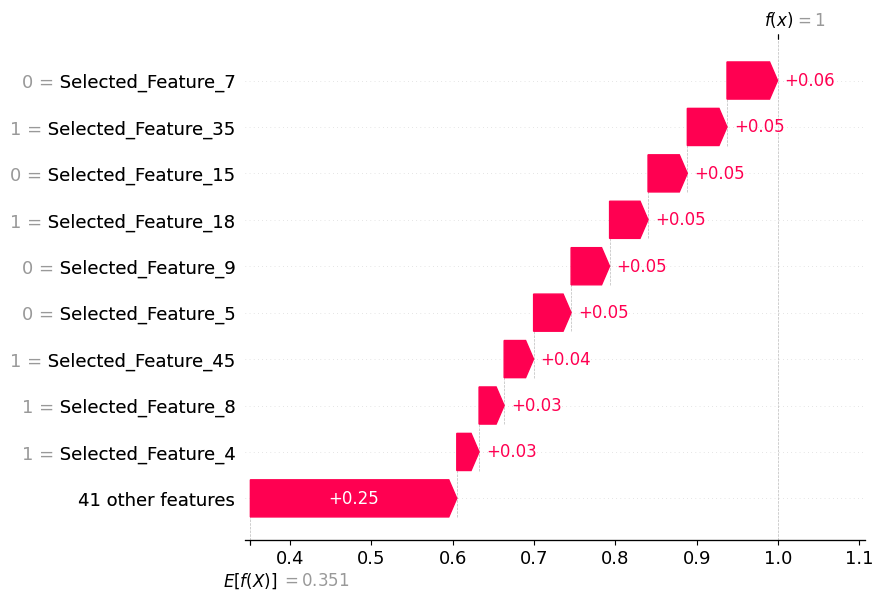

Attempting to generate waterfall plot using KernelExplainer results (for a single instance)...
Generating waterfall plot for the explained sequence (flattened view)...


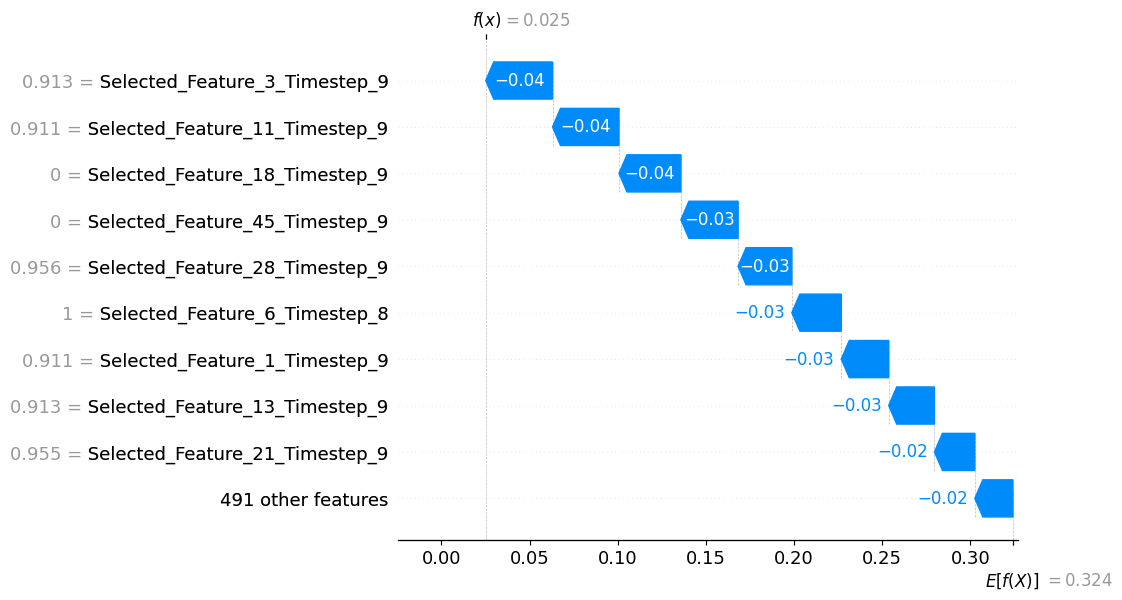


Waterfall plot generation attempted. Check the output cell above.


In [90]:
# Select an instance index to plot (e.g., the first instance in X_test)
instance_index_to_plot = 0 # Change this index to visualize a different test instance

# Check if necessary variables for plotting are available
if 'explainer' in globals() and 'shap_values' in globals() and 'X_test' in globals() and 'selected_feature_names' in globals():
    print("Attempting to generate waterfall plot using TreeExplainer results...")

    try:
        # Extract the instance's feature values
        instance_features = X_test[instance_index_to_plot, :]

        # Extract the instance's SHAP values and base value based on the structure
        # expected for TreeExplainer on binary classification (often list [class0, class1])
        if isinstance(shap_values, list) and len(shap_values) > 1:
            # Get SHAP values for the positive class (index 1) for the specific instance
            instance_shap_values = shap_values[1][instance_index_to_plot, :]
            # Get the expected value for the positive class (index 1)
            if isinstance(explainer.expected_value, (list, np.ndarray)) and len(explainer.expected_value) > 1:
                 base_value = explainer.expected_value[1]
            elif np.isscalar(explainer.expected_value):
                 base_value = explainer.expected_value
            else:
                 print("Warning: Unexpected explainer.expected_value type for list shap_values.")
                 base_value = explainer.expected_value

        elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3 and shap_values.shape[2] > 1:
             # Handle 3D array case
             instance_shap_values = shap_values[instance_index_to_plot, :, 1]
             if isinstance(explainer.expected_value, np.ndarray) and explainer.expected_value.ndim == 1 and explainer.expected_value.shape[0] > 1:
                  base_value = explainer.expected_value[1]
             elif np.isscalar(explainer.expected_value):
                  base_value = explainer.expected_value
             else:
                  print("Warning: Unexpected explainer.expected_value type for 3D array shap_values.")
                  base_value = explainer.expected_value
        else:
            # Fallback for single-output models
            instance_shap_values = shap_values[instance_index_to_plot, :]
            base_value = explainer.expected_value


        # Ensure base_value is scalar
        if isinstance(base_value, np.ndarray) and base_value.size == 1:
             base_value_scalar = base_value.item()
        elif np.isscalar(base_value):
             base_value_scalar = base_value
        else:
             print(f"Warning: Base value is not scalar ({type(base_value)}). Plot might fail.")
             base_value_scalar = base_value # Use as is


        # Check for shape compatibility before plotting
        if instance_shap_values.shape == instance_features.shape and len(selected_feature_names) == instance_features.shape[0]:
            # *** This is where we call waterfall_plot instead of force_plot ***
            print(f"Generating waterfall plot for instance index {instance_index_to_plot}...")
            shap.waterfall_plot(
                shap.Explanation(
                    values=instance_shap_values,
                    base_values=base_value_scalar,
                    data=instance_features,
                    feature_names=selected_feature_names
                )
                # Optional: max_display=N to limit the number of features shown
            )
            # Use plt.show() to ensure the plot is displayed in a non-interactive environment
            plt.show()
        else:
            print("Shape mismatch between SHAP values, features, or feature names.")
            print(f"SHAP values shape: {instance_shap_values.shape}")
            print(f"Features shape: {instance_features.shape}")
            print(f"Feature names length: {len(selected_feature_names)}")

    except Exception as e:
        print(f"Error generating waterfall plot with TreeExplainer results: {e}")
        print(f"Error Type: {type(e).__name__}")
        print("\nDebug Info:")
        # Print the shapes and types of variables being passed
        print(f"Base Value Type: {type(base_value)}, Value: {base_value}")
        print(f"Instance SHAP Values Type: {type(instance_shap_values)}, Shape: {instance_shap_values.shape if isinstance(instance_shap_values, np.ndarray) else 'N/A'}")
        print(f"Instance Features Type: {type(instance_features)}, Shape: {instance_features.shape if isinstance(instance_features, np.ndarray) else 'N/A'}")
        print(f"Feature Names Type: {type(selected_feature_names)}, Length: {len(selected_feature_names) if isinstance(selected_feature_names, list) else 'N/A'}")

# --- Option 2: Plotting using results from KernelExplainer (if used for CNN-LSTM) ---
# This requires 'explainer_kernel', 'shap_values_flat' (for a single instance),
# 'instance_flat' (the flattened single instance data), and 'feature_names_flat'
# to be available from previous cells (specifically the cell that calculated SHAP for one instance).

# Check if necessary variables for plotting are available
if 'explainer_kernel' in globals() and 'shap_values_flat' in globals() and 'instance_flat' in globals() and 'feature_names_flat' in globals():
     print("Attempting to generate waterfall plot using KernelExplainer results (for a single instance)...")

     try:
         # These variables should already be in the correct shape from the previous cell
         # shap_values_flat: (1, num_flattened_features)
         # instance_flat: (1, num_flattened_features)
         # explainer_kernel.expected_value: scalar
         # feature_names_flat: list of strings

         # We need to pass the first row (index 0) to waterfall_plot
         shap_values_for_plot_flat = shap_values_flat[0] # Shape (num_flattened_features,)
         instance_features_for_plot_flat = instance_flat[0] # Shape (num_flattened_features,)
         base_value_kernel = explainer_kernel.expected_value # Should be scalar

         # Check for shape compatibility before plotting
         if shap_values_for_plot_flat.shape == instance_features_for_plot_flat.shape and len(feature_names_flat) == instance_features_for_plot_flat.shape[0]:
             # *** This is where we call waterfall_plot instead of force_plot ***
             print("Generating waterfall plot for the explained sequence (flattened view)...")
             shap.waterfall_plot(
                shap.Explanation(
                     values=shap_values_for_plot_flat,
                     base_values=base_value_kernel,
                     data=instance_features_for_plot_flat,
                     feature_names=feature_names_flat
                )
                 # Optional: max_display=N
             )
             # Use plt.show() to ensure the plot is displayed
             plt.show()
         else:
             print("Shape mismatch between flattened SHAP values, features, or feature names.")
             print(f"Flattened SHAP values shape: {shap_values_for_plot_flat.shape}")
             print(f"Flattened Features shape: {instance_features_for_plot_flat.shape}")
             print(f"Flattened Feature names length: {len(feature_names_flat)}")


     except Exception as e:
        print(f"Error generating waterfall plot with KernelExplainer results: {e}")
        print(f"Error Type: {type(e).__name__}")
        print("\nDebug Info:")
        # Print the shapes and types of variables being passed
        print(f"Base Value Kernel Type: {type(base_value_kernel)}, Value: {base_value_kernel}")
        print(f"Flattened SHAP Values Type: {type(shap_values_for_plot_flat)}, Shape: {shap_values_for_plot_flat.shape if isinstance(shap_values_for_plot_flat, np.ndarray) else 'N/A'}")
        print(f"Flattened Instance Features Type: {type(instance_features_for_plot_flat)}, Shape: {instance_features_for_plot_flat.shape if isinstance(instance_features_for_plot_flat, np.ndarray) else 'N/A'}")
        print(f"Flattened Feature Names Type: {type(feature_names_flat)}, Length: {len(feature_names_flat) if isinstance(feature_names_flat, list) else 'N/A'}")

print("\nWaterfall plot generation attempted. Check the output cell above.")